# Importing essential libraries and the dataset

In [266]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, PowerTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer, PolynomialFeatures, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm

In [267]:
df=pd.read_csv('Car_price.csv')

# Exploratory Data Analysis

In [268]:
#Number of rows and columns in the dataset
df.shape

(11914, 16)

In [269]:
#How does the data look
df.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4427,Mitsubishi,Expo,1995,regular unleaded,136.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,24,18,436,2000
9376,GMC,Sierra 1500,2017,regular unleaded,355.0,8.0,AUTOMATIC,four wheel drive,4.0,NaN,Large,Extended Cab Pickup,22,16,549,45330
6580,Mercedes-Benz,M-Class,2015,premium unleaded (required),302.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury",Midsize,4dr SUV,22,17,617,50800
5973,Lexus,IS 250,2015,premium unleaded (required),204.0,6.0,AUTOMATIC,rear wheel drive,4.0,Luxury,Midsize,Sedan,30,21,454,41440
871,Saab,9-7X,2007,regular unleaded,300.0,8.0,AUTOMATIC,all wheel drive,4.0,Luxury,Midsize,4dr SUV,19,13,376,41190


In [270]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [271]:
#Number of duplicates in the data
df.duplicated().sum()

715

In [272]:
#Let us drop the duplicated values first and then proceed
df=df.drop_duplicates()
df.shape

(11199, 16)

In [273]:
#Create a backup file
backup_df=df.copy()

In [274]:
#Number of nulls in the data
df.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3376


In [275]:
#Percentage of nulls in the data
((df.isnull().sum())/(df.shape[0]))*100

,0
Make,0.000000
Model,0.000000
Year,0.000000
Engine Fuel Type,0.026788
Engine HP,0.616126
Engine Cylinders,0.267881
Transmission Type,0.000000
Driven_Wheels,0.000000
Number of Doors,0.053576
Market Category,30.145549


In [276]:
df[df.drop(columns=['Market Category']).isnull().any(axis=1)]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,36620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9853,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,NaN,Compact,Wagon,92,120,1720,31950
9854,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,NaN,Compact,Wagon,92,120,1720,35950
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199


In [277]:
#For the electic vehicles, value engine cylinder is 0
df.loc[df['Engine Fuel Type'] == 'electric', 'Engine Cylinders'] = df.loc[df['Engine Fuel Type'] == 'electric', 'Engine Cylinders'].fillna(0)

In [278]:
#Deleteting these nulls here itself as these values combined make up less than 1% of the data. Removing them won't affect model much
df=df.dropna(subset=['Engine Fuel Type','Engine HP','Engine Cylinders','Number of Doors'])
df.shape

(11106, 16)

In [279]:
#Look at the remainder nulls
((df.isnull().sum())/(df.shape[0]))*100

,0
Make,0.000000
Model,0.000000
Year,0.000000
Engine Fuel Type,0.000000
Engine HP,0.000000
Engine Cylinders,0.000000
Transmission Type,0.000000
Driven_Wheels,0.000000
Number of Doors,0.000000
Market Category,30.271925


In [280]:
df.describe().round(2)

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11106.00,11106.00,11106.00,11106.00,11106.00,11106.00,11106.00,11106.00
mean,2010.70,253.42,5.68,3.45,26.33,19.38,1556.77,41894.79
std,7.24,110.19,1.77,0.87,7.78,7.22,1443.37,61706.43
min,1990.00,55.00,0.00,2.00,12.00,7.00,2.00,2000.00
25%,2007.00,172.00,4.00,2.00,22.00,16.00,549.00,21553.75
50%,2015.00,240.00,6.00,4.00,25.00,18.00,1385.00,30600.00
75%,2016.00,303.00,6.00,4.00,30.00,22.00,2009.00,43013.75
max,2017.00,1001.00,16.00,4.00,354.00,137.00,5657.00,2065902.00


In [281]:
df.corr(numeric_only=True)['MSRP']

,MSRP
Year,0.209223
Engine HP,0.658727
Engine Cylinders,0.550004
Number of Doors,-0.145639
highway MPG,-0.200627
city mpg,-0.214461
Popularity,-0.048413
MSRP,1.000000


In [282]:
#!pip install ydata_profiling
#import ydata_profiling as yp
#yp.ProfileReport(df)

## Univariate Analysis

### Categorical Data

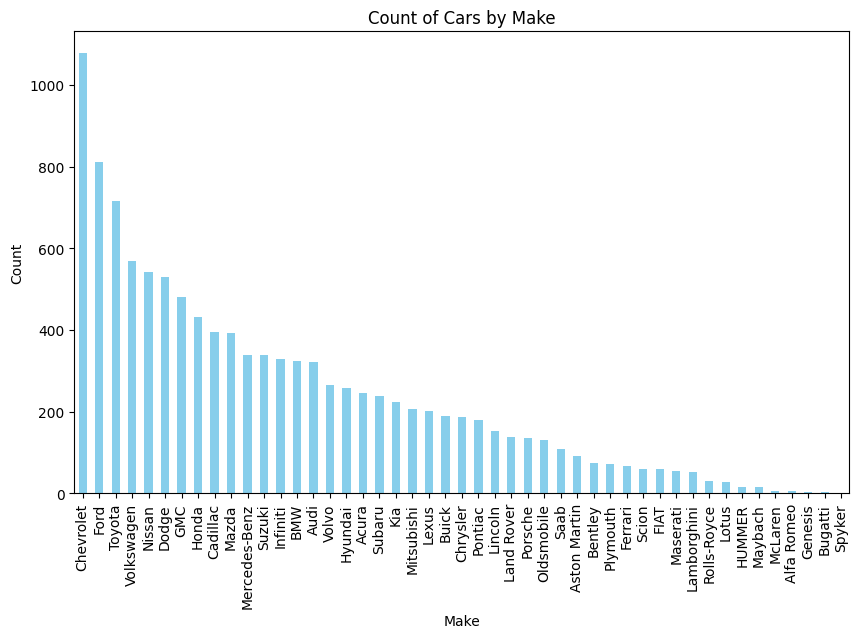

In [283]:
counts = df['Make'].value_counts()

plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue')

plt.title('Count of Cars by Make')
plt.xlabel('Make')
plt.ylabel('Count')

plt.show()

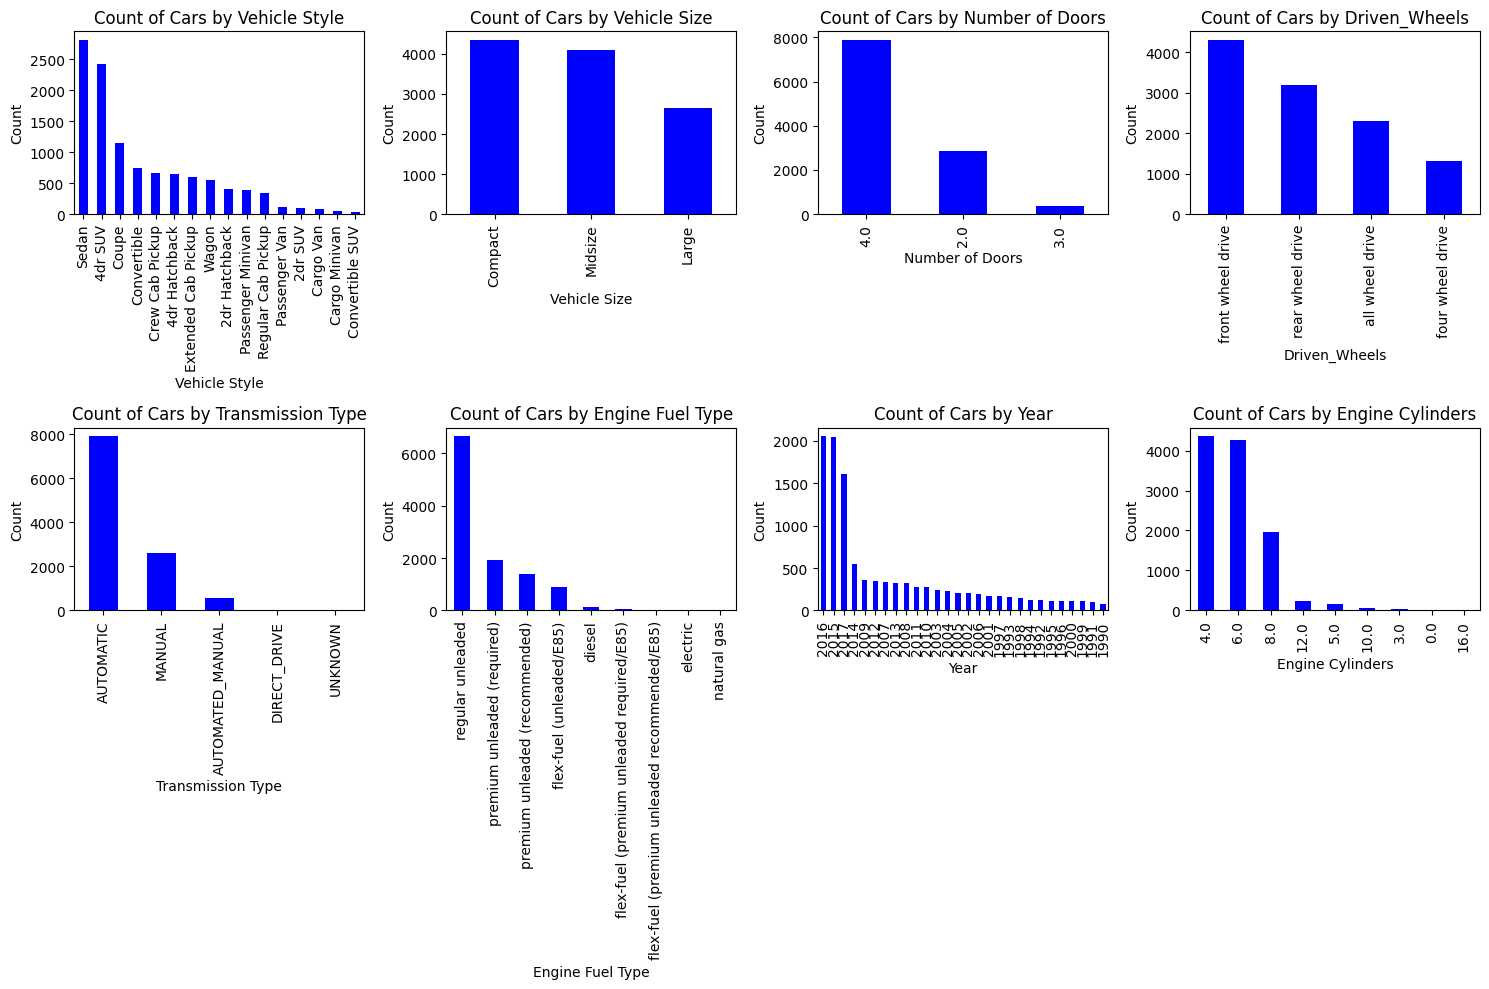

In [284]:
ls=['Vehicle Style','Vehicle Size','Number of Doors','Driven_Wheels','Transmission Type','Engine Fuel Type','Year','Engine Cylinders']
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (15,10))

for i, ax in zip(ls, axes.flatten()):
    df[i].value_counts().plot(kind='bar', color='blue', ax=ax)
    ax.set_title(f'Count of Cars by {i}')
    ax.set_xlabel(i)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()



### Numerical Data

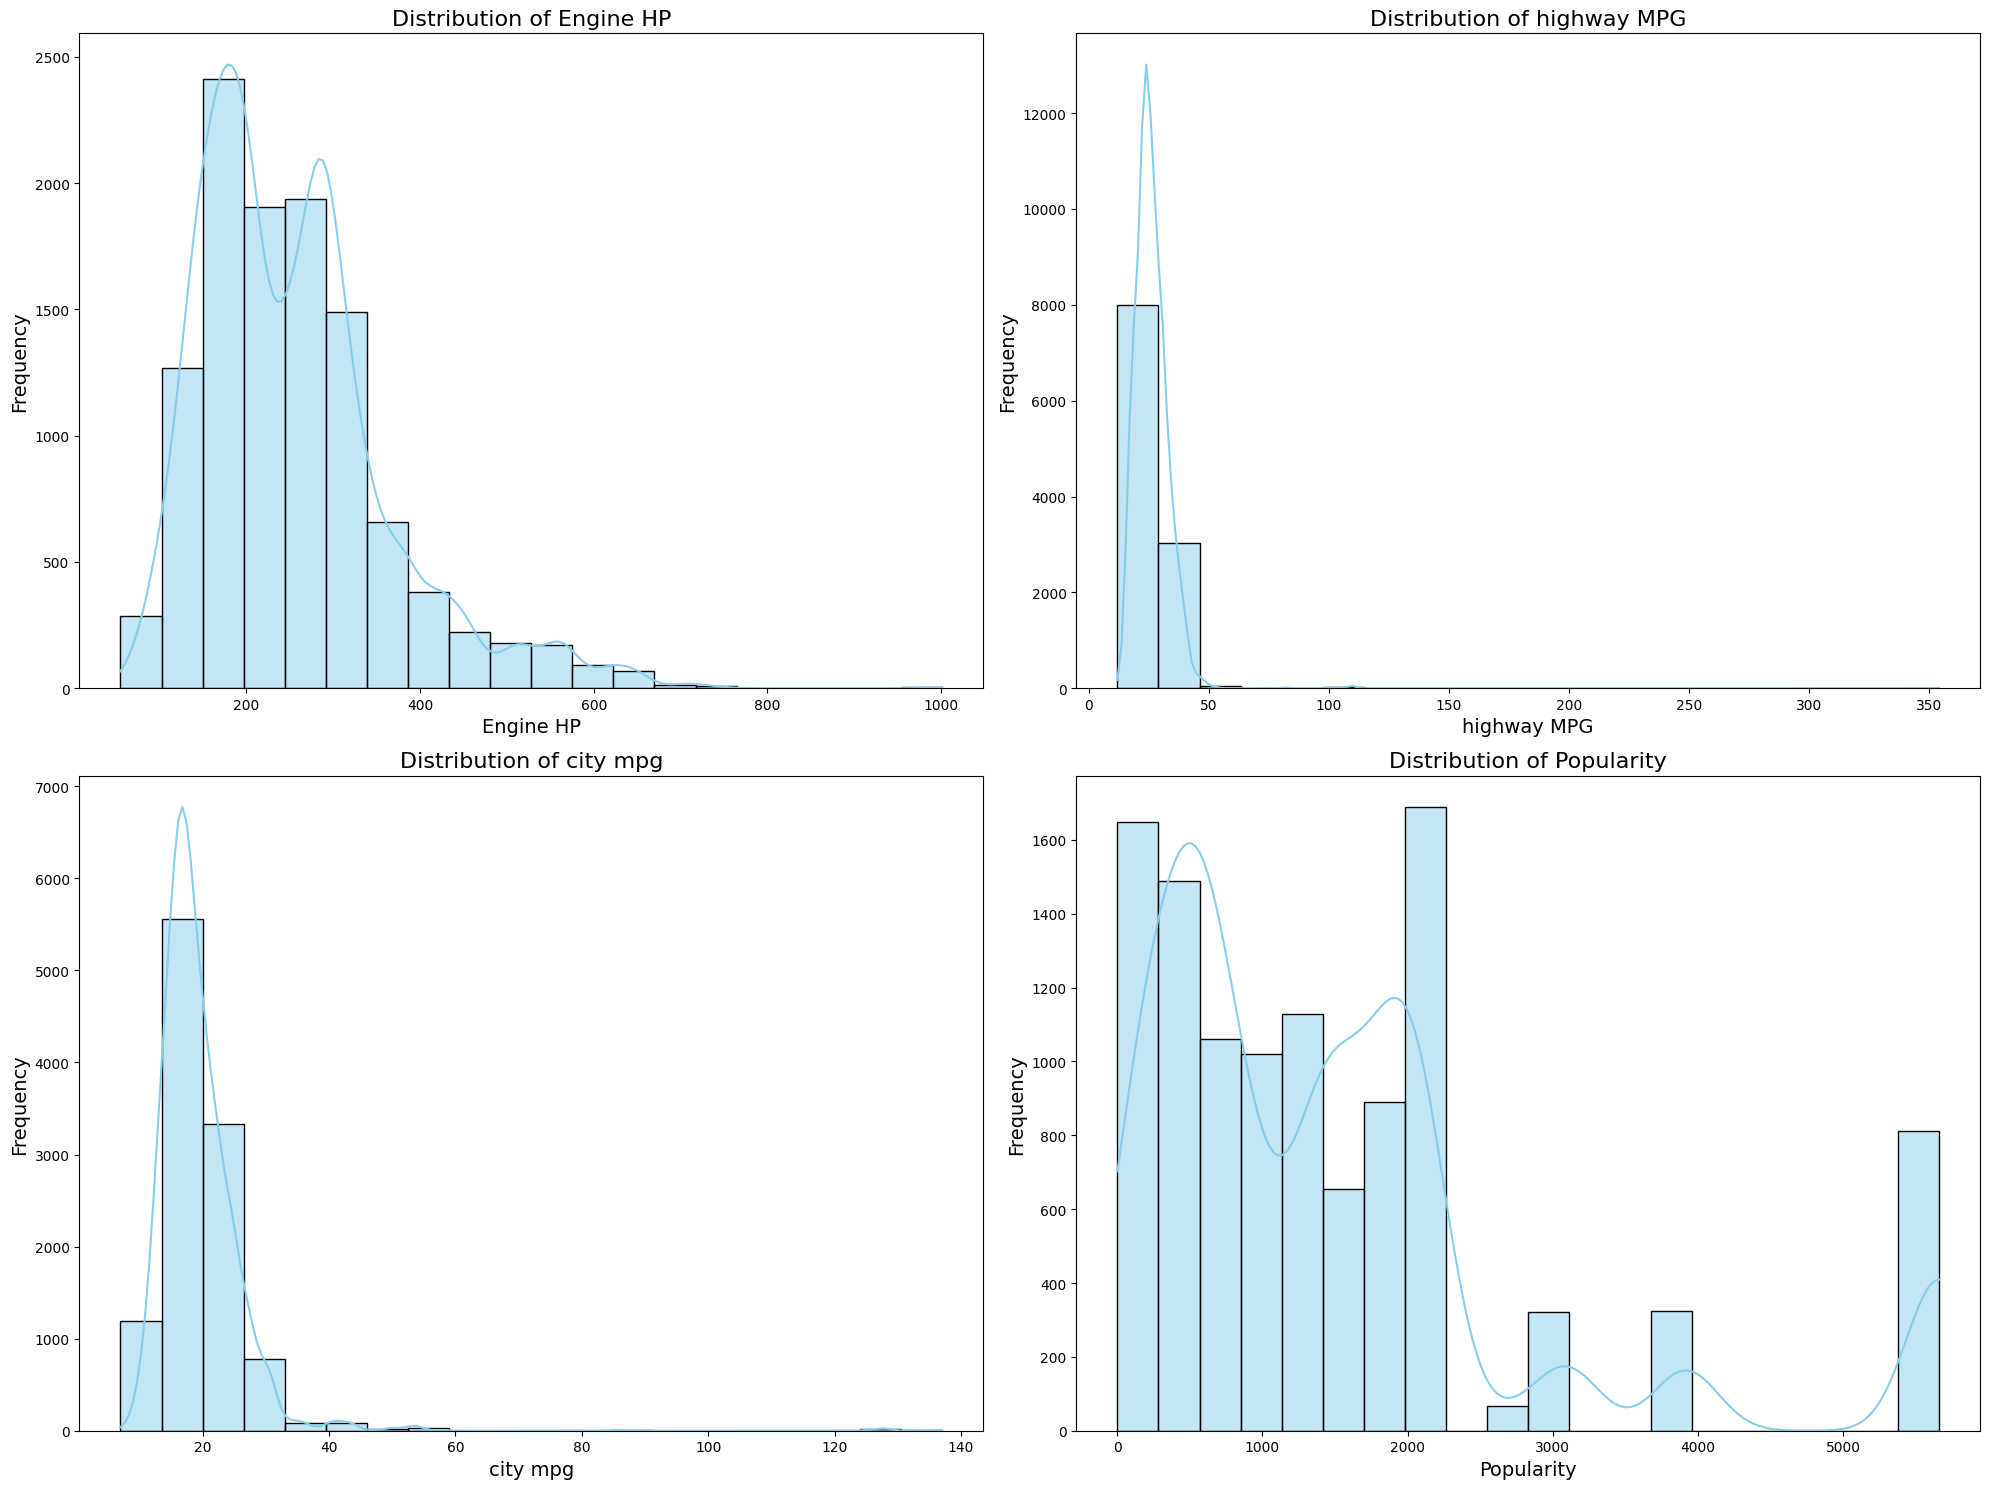

In [285]:
ls=['Engine HP','highway MPG','city mpg','Popularity']
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,15))

for i, ax in zip(ls, axes.flatten()):
    sns.histplot(df[i], bins=20, kde=True, color='skyblue', edgecolor='black', ax=ax)

    # Adding titles and labels
    ax.set_title(f'Distribution of {i}', fontsize=16)
    ax.set_xlabel(i, fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()

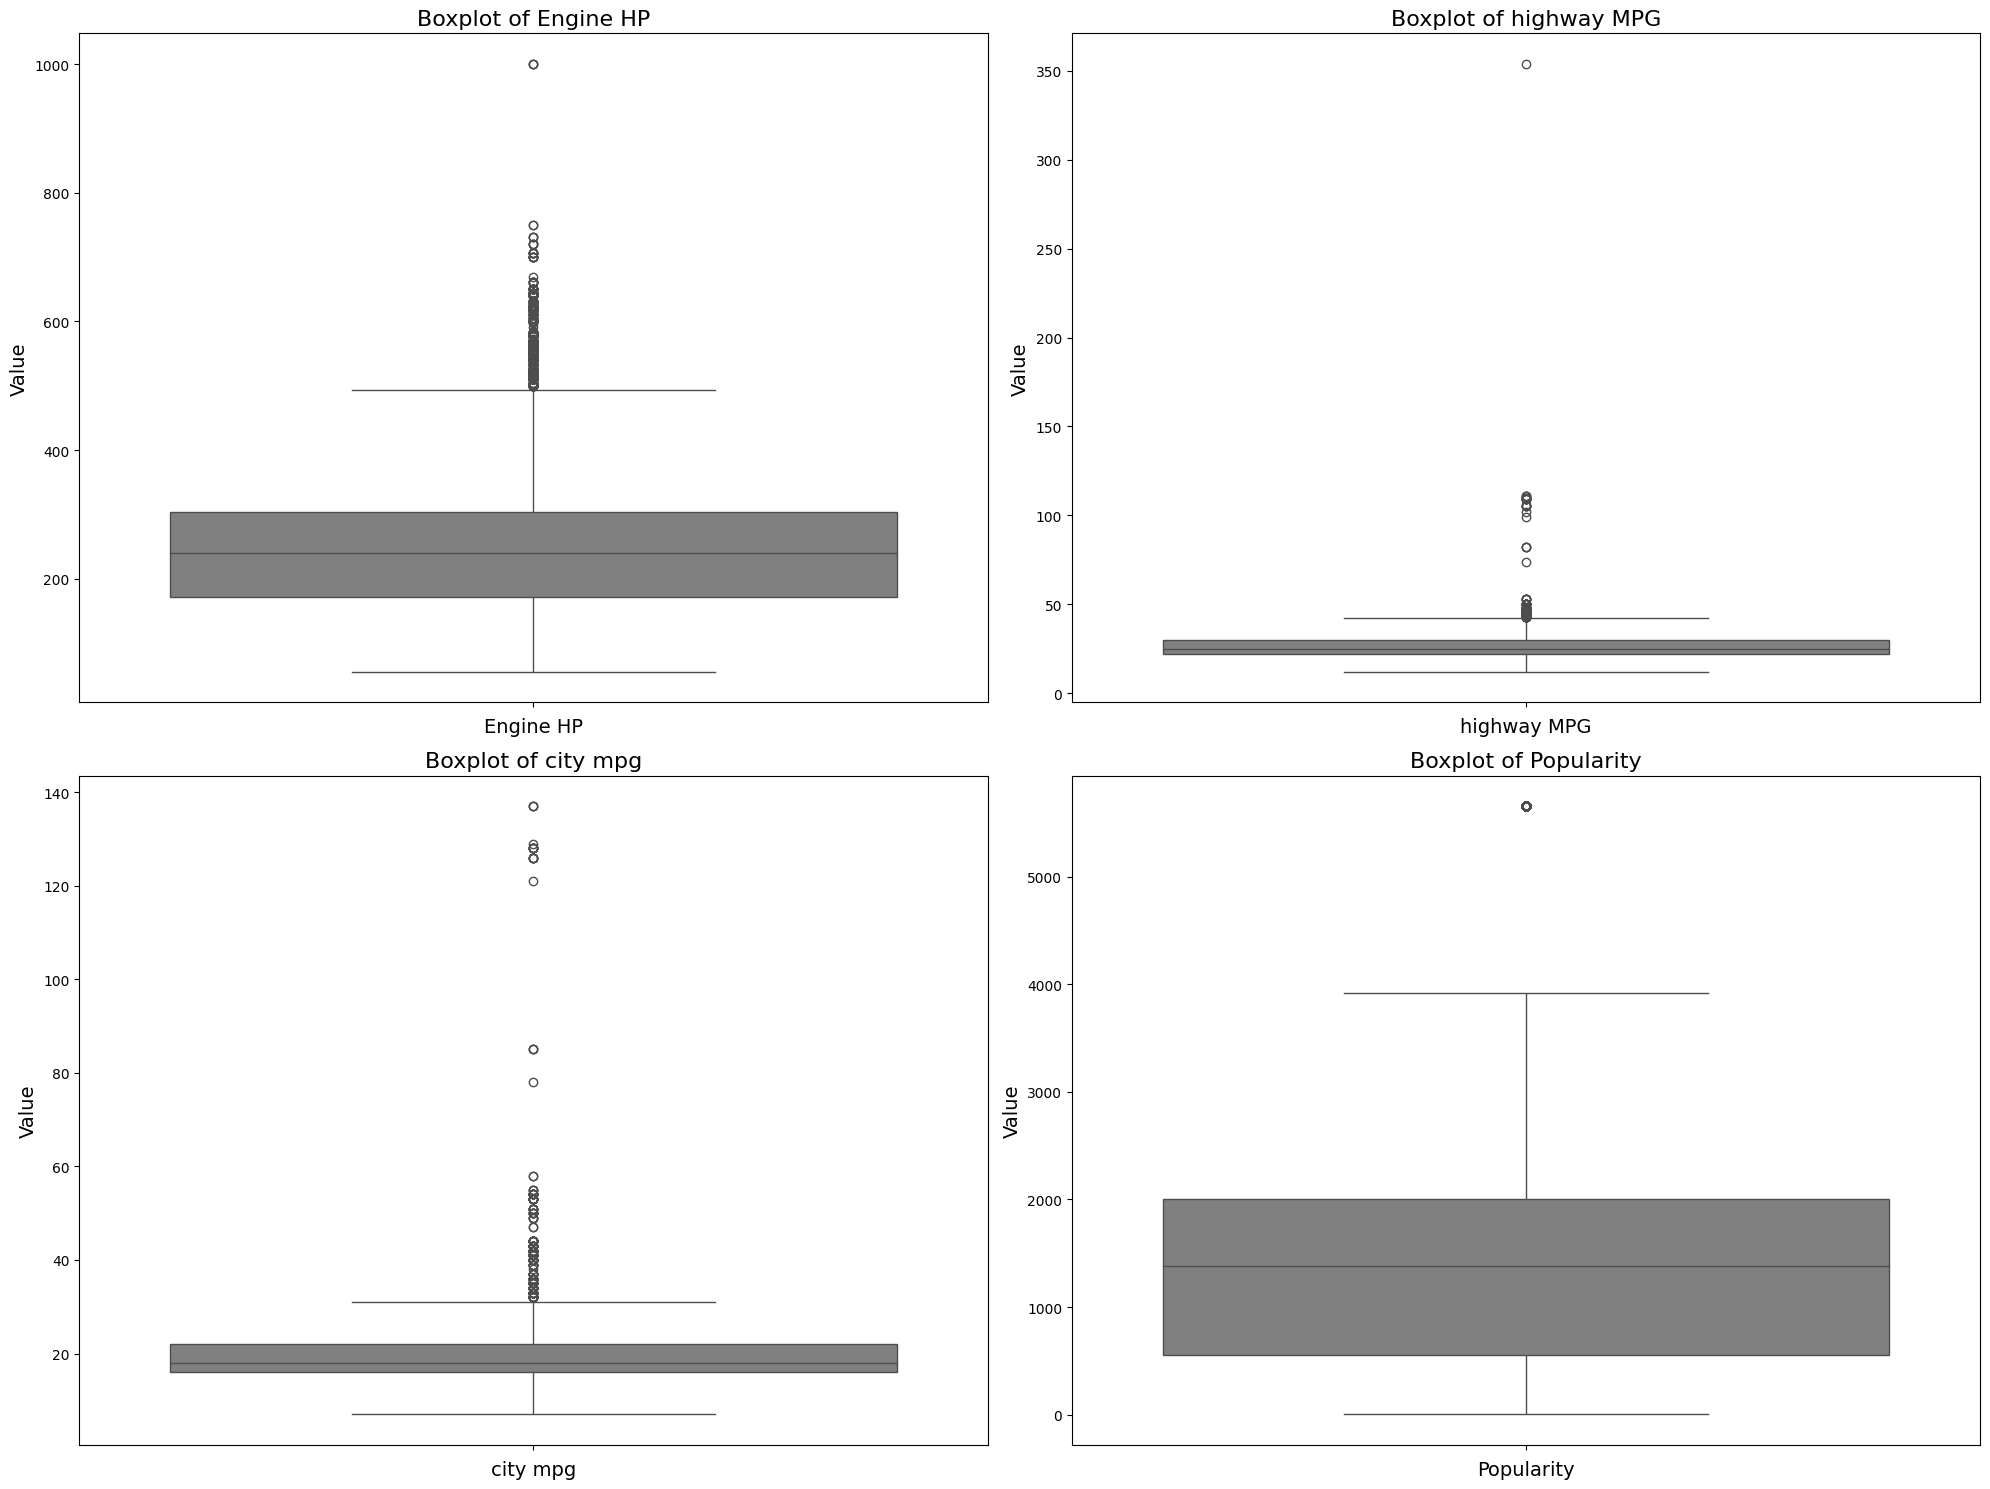

In [286]:
ls=['Engine HP','highway MPG','city mpg','Popularity']
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,15))

for i, ax in zip(ls, axes.flatten()):
    sns.boxplot(df[i], color='grey', ax=ax)

    # Adding titles and labels
    ax.set_title(f'Boxplot of {i}', fontsize=16)
    ax.set_xlabel(i, fontsize=14)
    ax.set_ylabel('Value', fontsize=14)

plt.tight_layout()
plt.show()

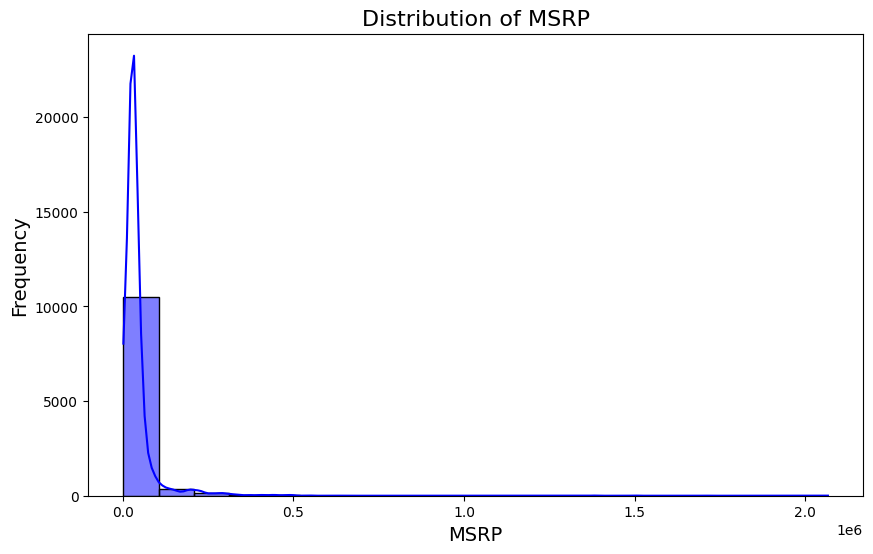

In [287]:
plt.figure(figsize=(10, 6))
sns.histplot(df['MSRP'], bins=20, kde=True, color='blue', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of MSRP', fontsize=16)
plt.xlabel('MSRP', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()
#The target variable is not normal

## Bivariate Analysis

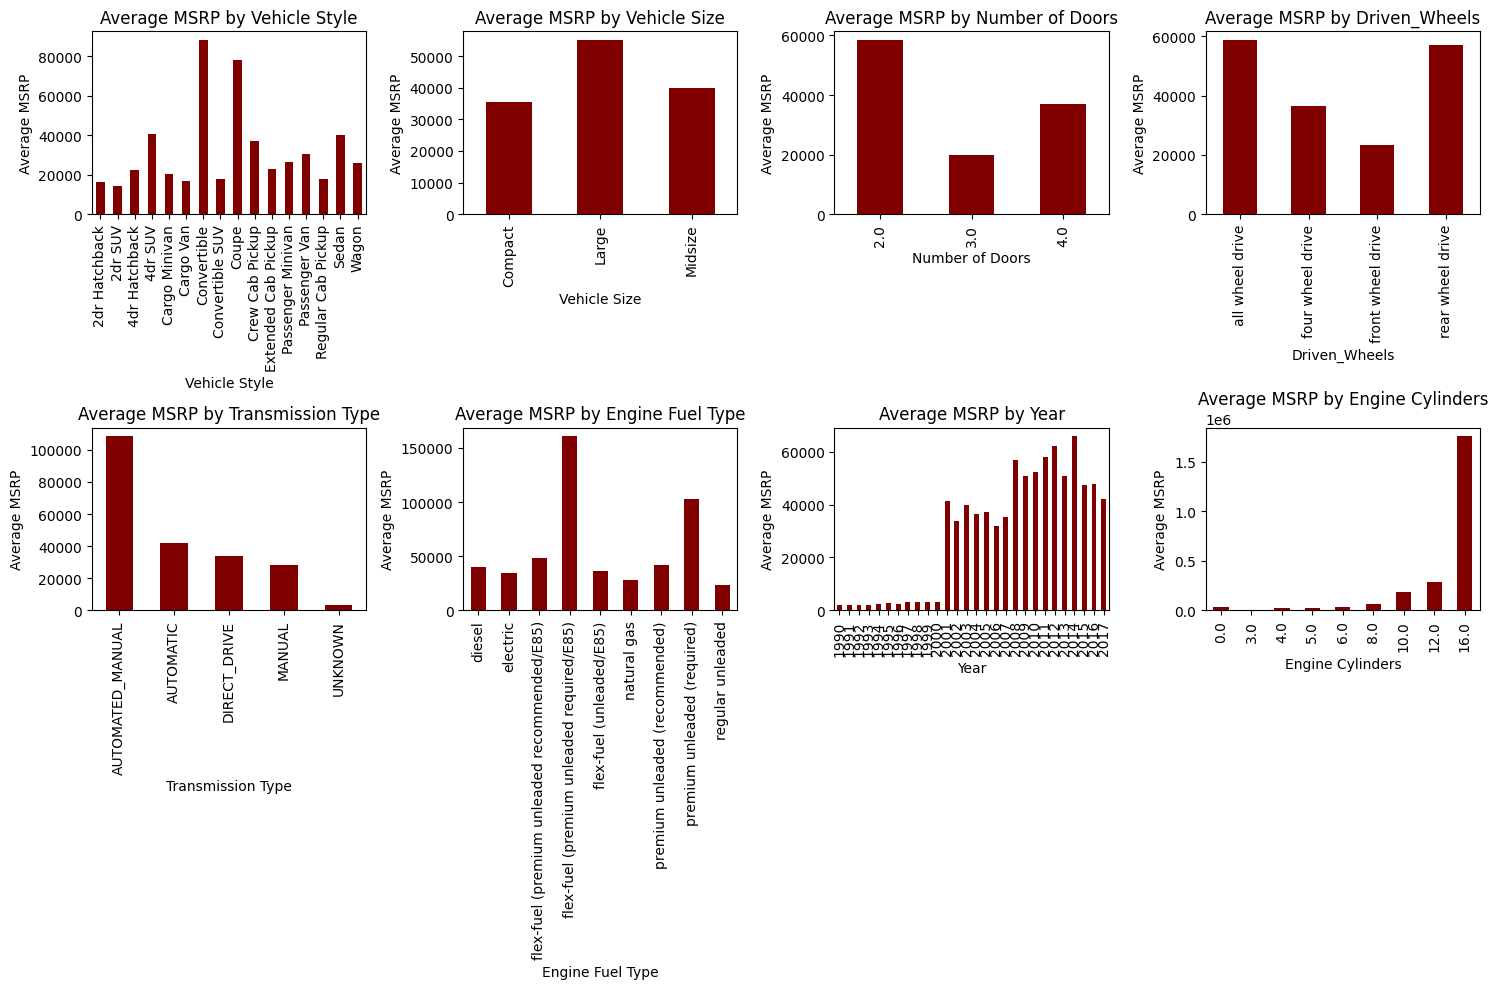

In [288]:
ls=['Vehicle Style','Vehicle Size','Number of Doors','Driven_Wheels','Transmission Type','Engine Fuel Type','Year','Engine Cylinders']
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (15,10))

for i, ax in zip(ls, axes.flatten()):

    df.groupby(i)['MSRP'].mean().plot(kind='bar', color='maroon', ax=ax)
    ax.set_title(f'Average MSRP by {i}')
    ax.set_xlabel(i)
    ax.set_ylabel('Average MSRP')


plt.tight_layout()
plt.show()



<ipython-input-289-0352631f82cb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Make', y='MSRP', palette='Set2')


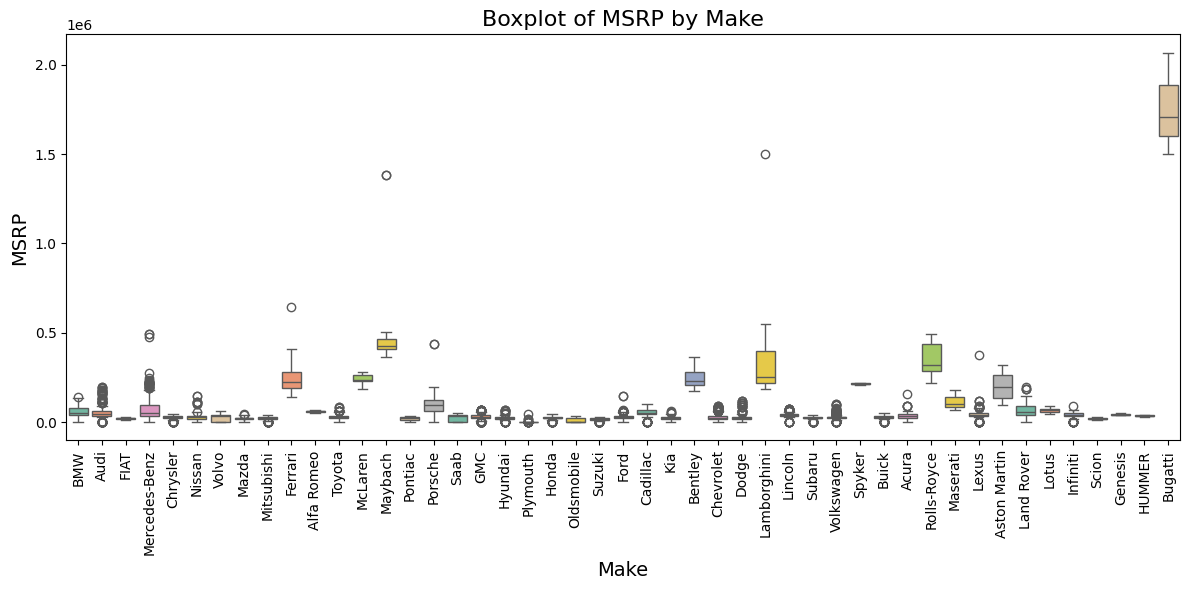

In [289]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Make', y='MSRP', palette='Set2')

# Adding titles and labels
plt.title('Boxplot of MSRP by Make', fontsize=16)
plt.xlabel('Make', fontsize=14)
plt.ylabel('MSRP', fontsize=14)

# Show the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

<ipython-input-290-9f28eb6ca54a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Transmission Type', y='MSRP', palette='Set2')


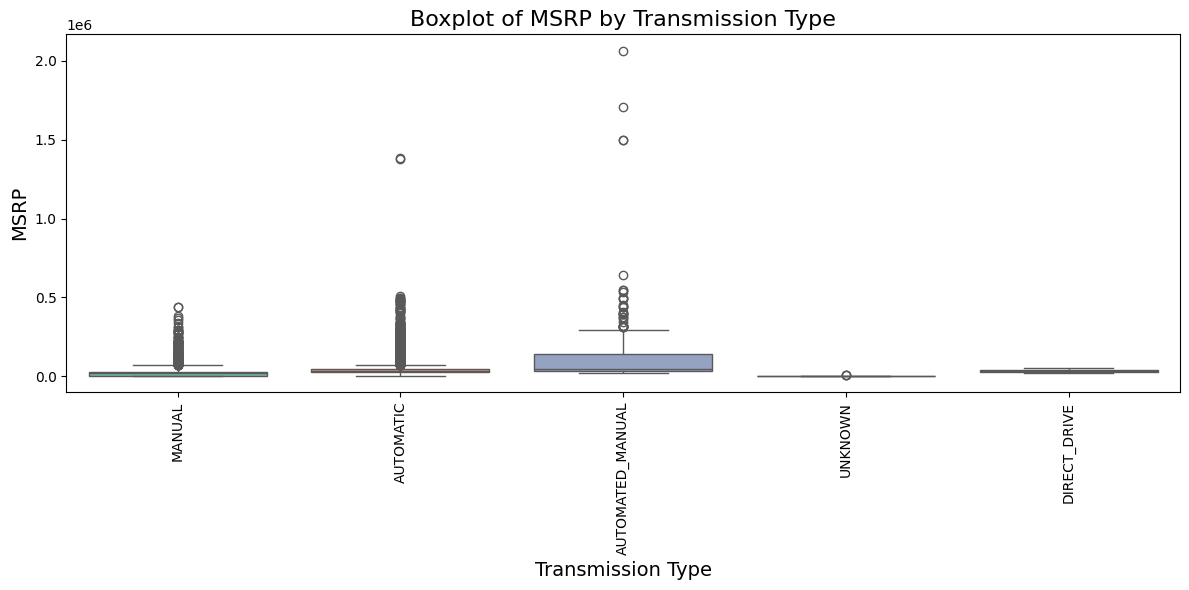

In [290]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Transmission Type', y='MSRP', palette='Set2')

# Adding titles and labels
plt.title('Boxplot of MSRP by Transmission Type', fontsize=16)
plt.xlabel('Transmission Type', fontsize=14)
plt.ylabel('MSRP', fontsize=14)

# Show the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

<ipython-input-291-d1b80817065e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Driven_Wheels', y='MSRP', palette='Set2')


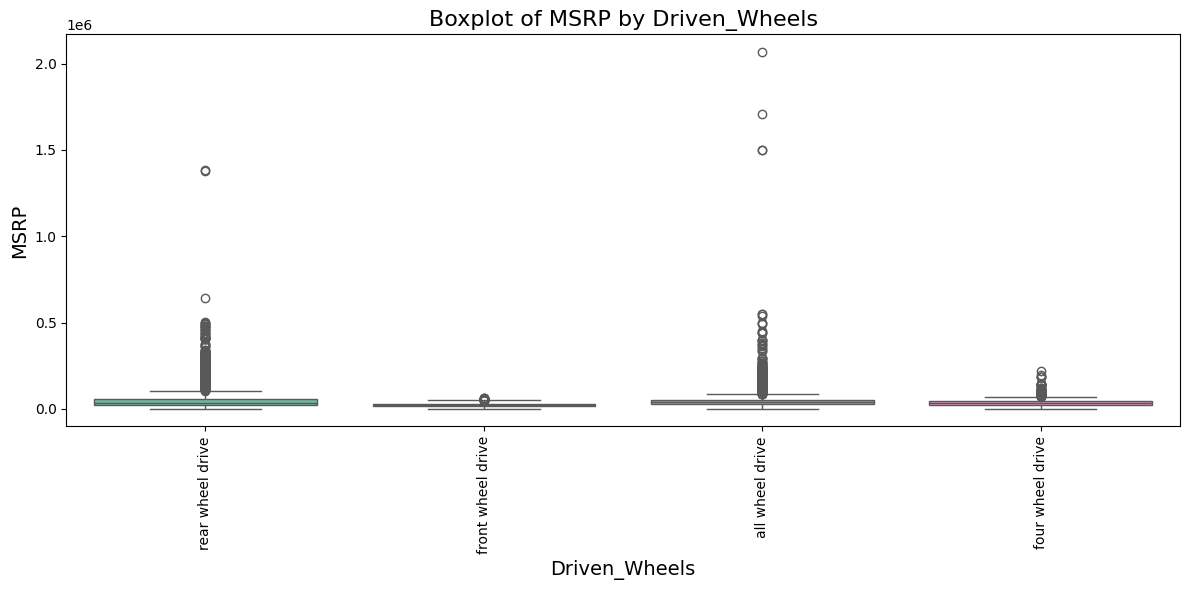

In [291]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Driven_Wheels', y='MSRP', palette='Set2')

# Adding titles and labels
plt.title('Boxplot of MSRP by Driven_Wheels', fontsize=16)
plt.xlabel('Driven_Wheels', fontsize=14)
plt.ylabel('MSRP', fontsize=14)

# Show the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

<ipython-input-292-1a4f7b19bffa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Vehicle Size', y='MSRP', palette='Set2')


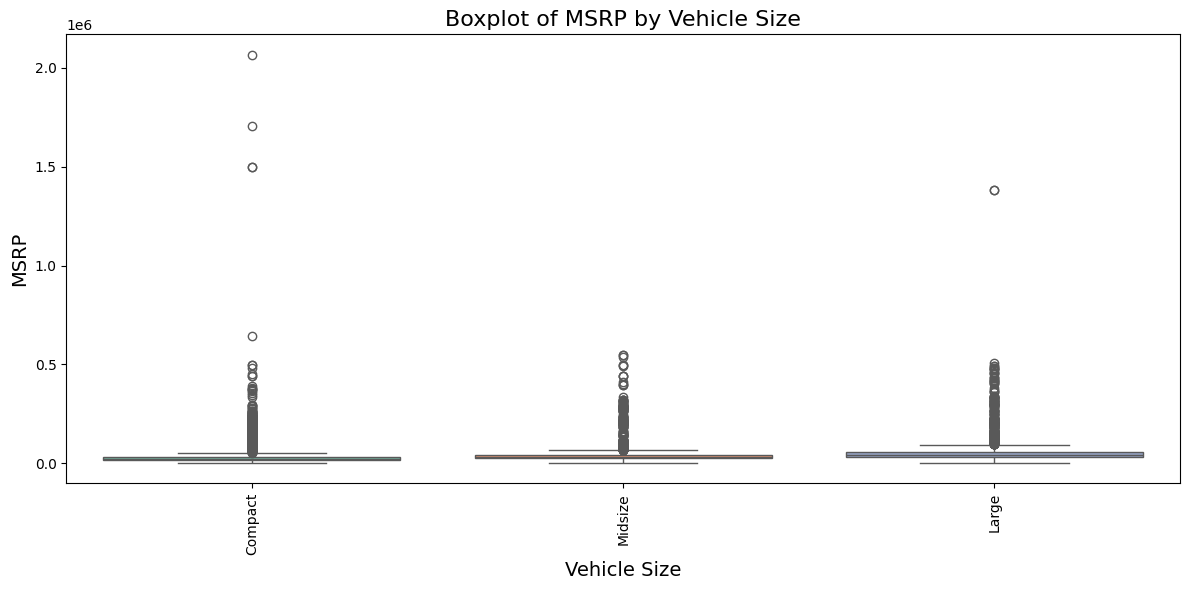

In [292]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Vehicle Size', y='MSRP', palette='Set2')

# Adding titles and labels
plt.title('Boxplot of MSRP by Vehicle Size', fontsize=16)
plt.xlabel('Vehicle Size', fontsize=14)
plt.ylabel('MSRP', fontsize=14)

# Show the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

<ipython-input-293-3f3b0ba4625d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Vehicle Style', y='MSRP', palette='Set2')


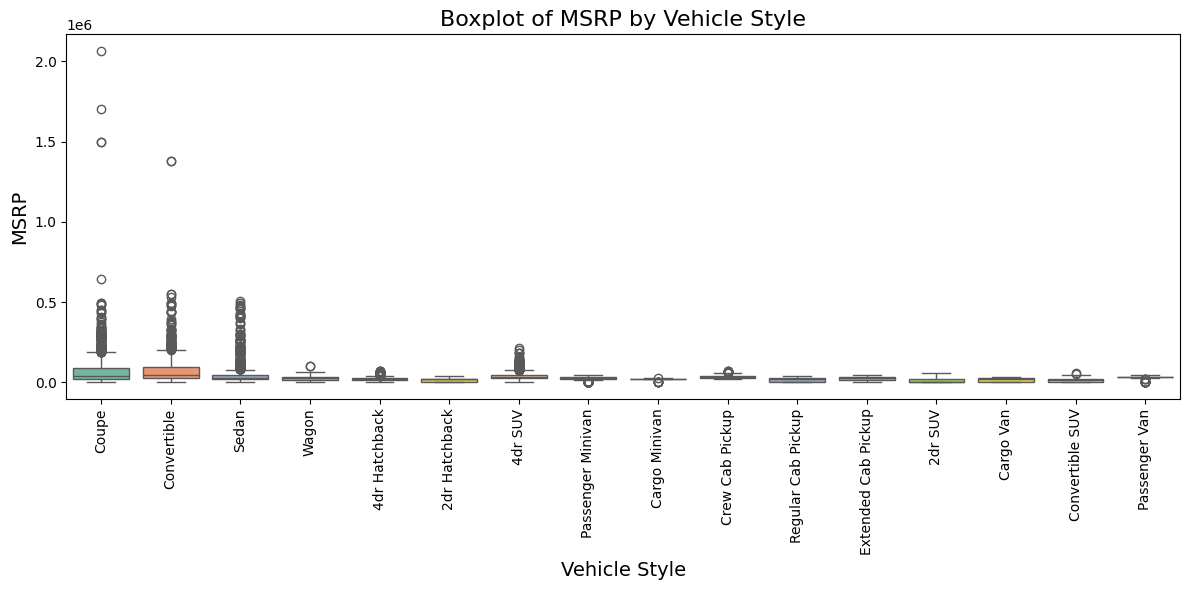

In [293]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Vehicle Style', y='MSRP', palette='Set2')

# Adding titles and labels
plt.title('Boxplot of MSRP by Vehicle Style', fontsize=16)
plt.xlabel('Vehicle Style', fontsize=14)
plt.ylabel('MSRP', fontsize=14)

# Show the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

<ipython-input-294-418c776e34d8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Year', y='MSRP', palette='Set2')


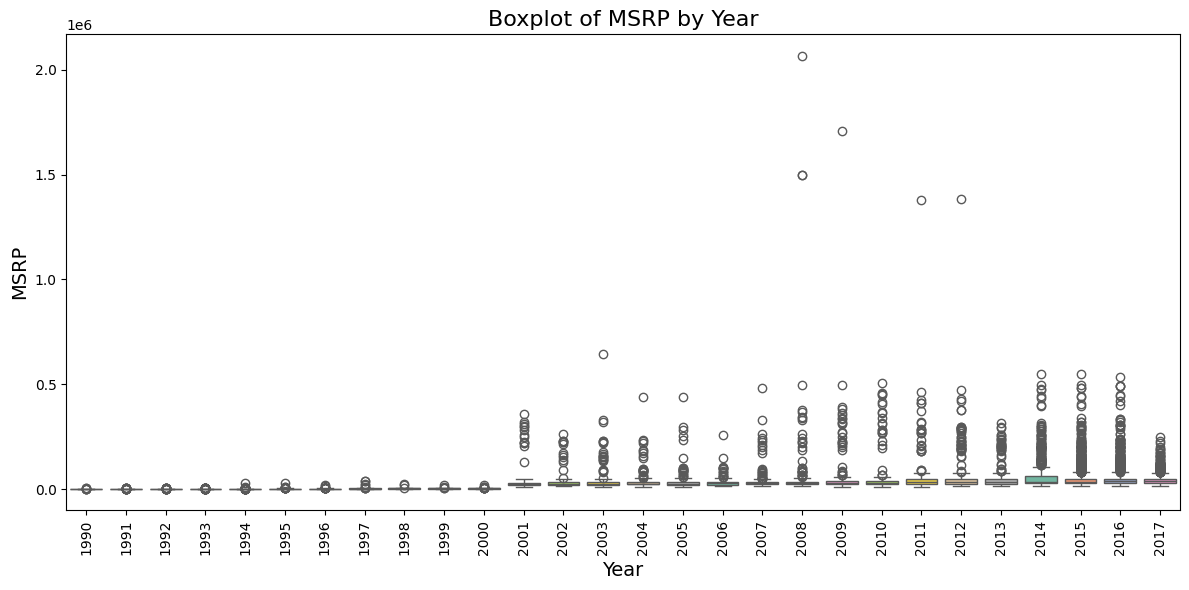

In [294]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Year', y='MSRP', palette='Set2')

# Adding titles and labels
plt.title('Boxplot of MSRP by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('MSRP', fontsize=14)

# Show the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

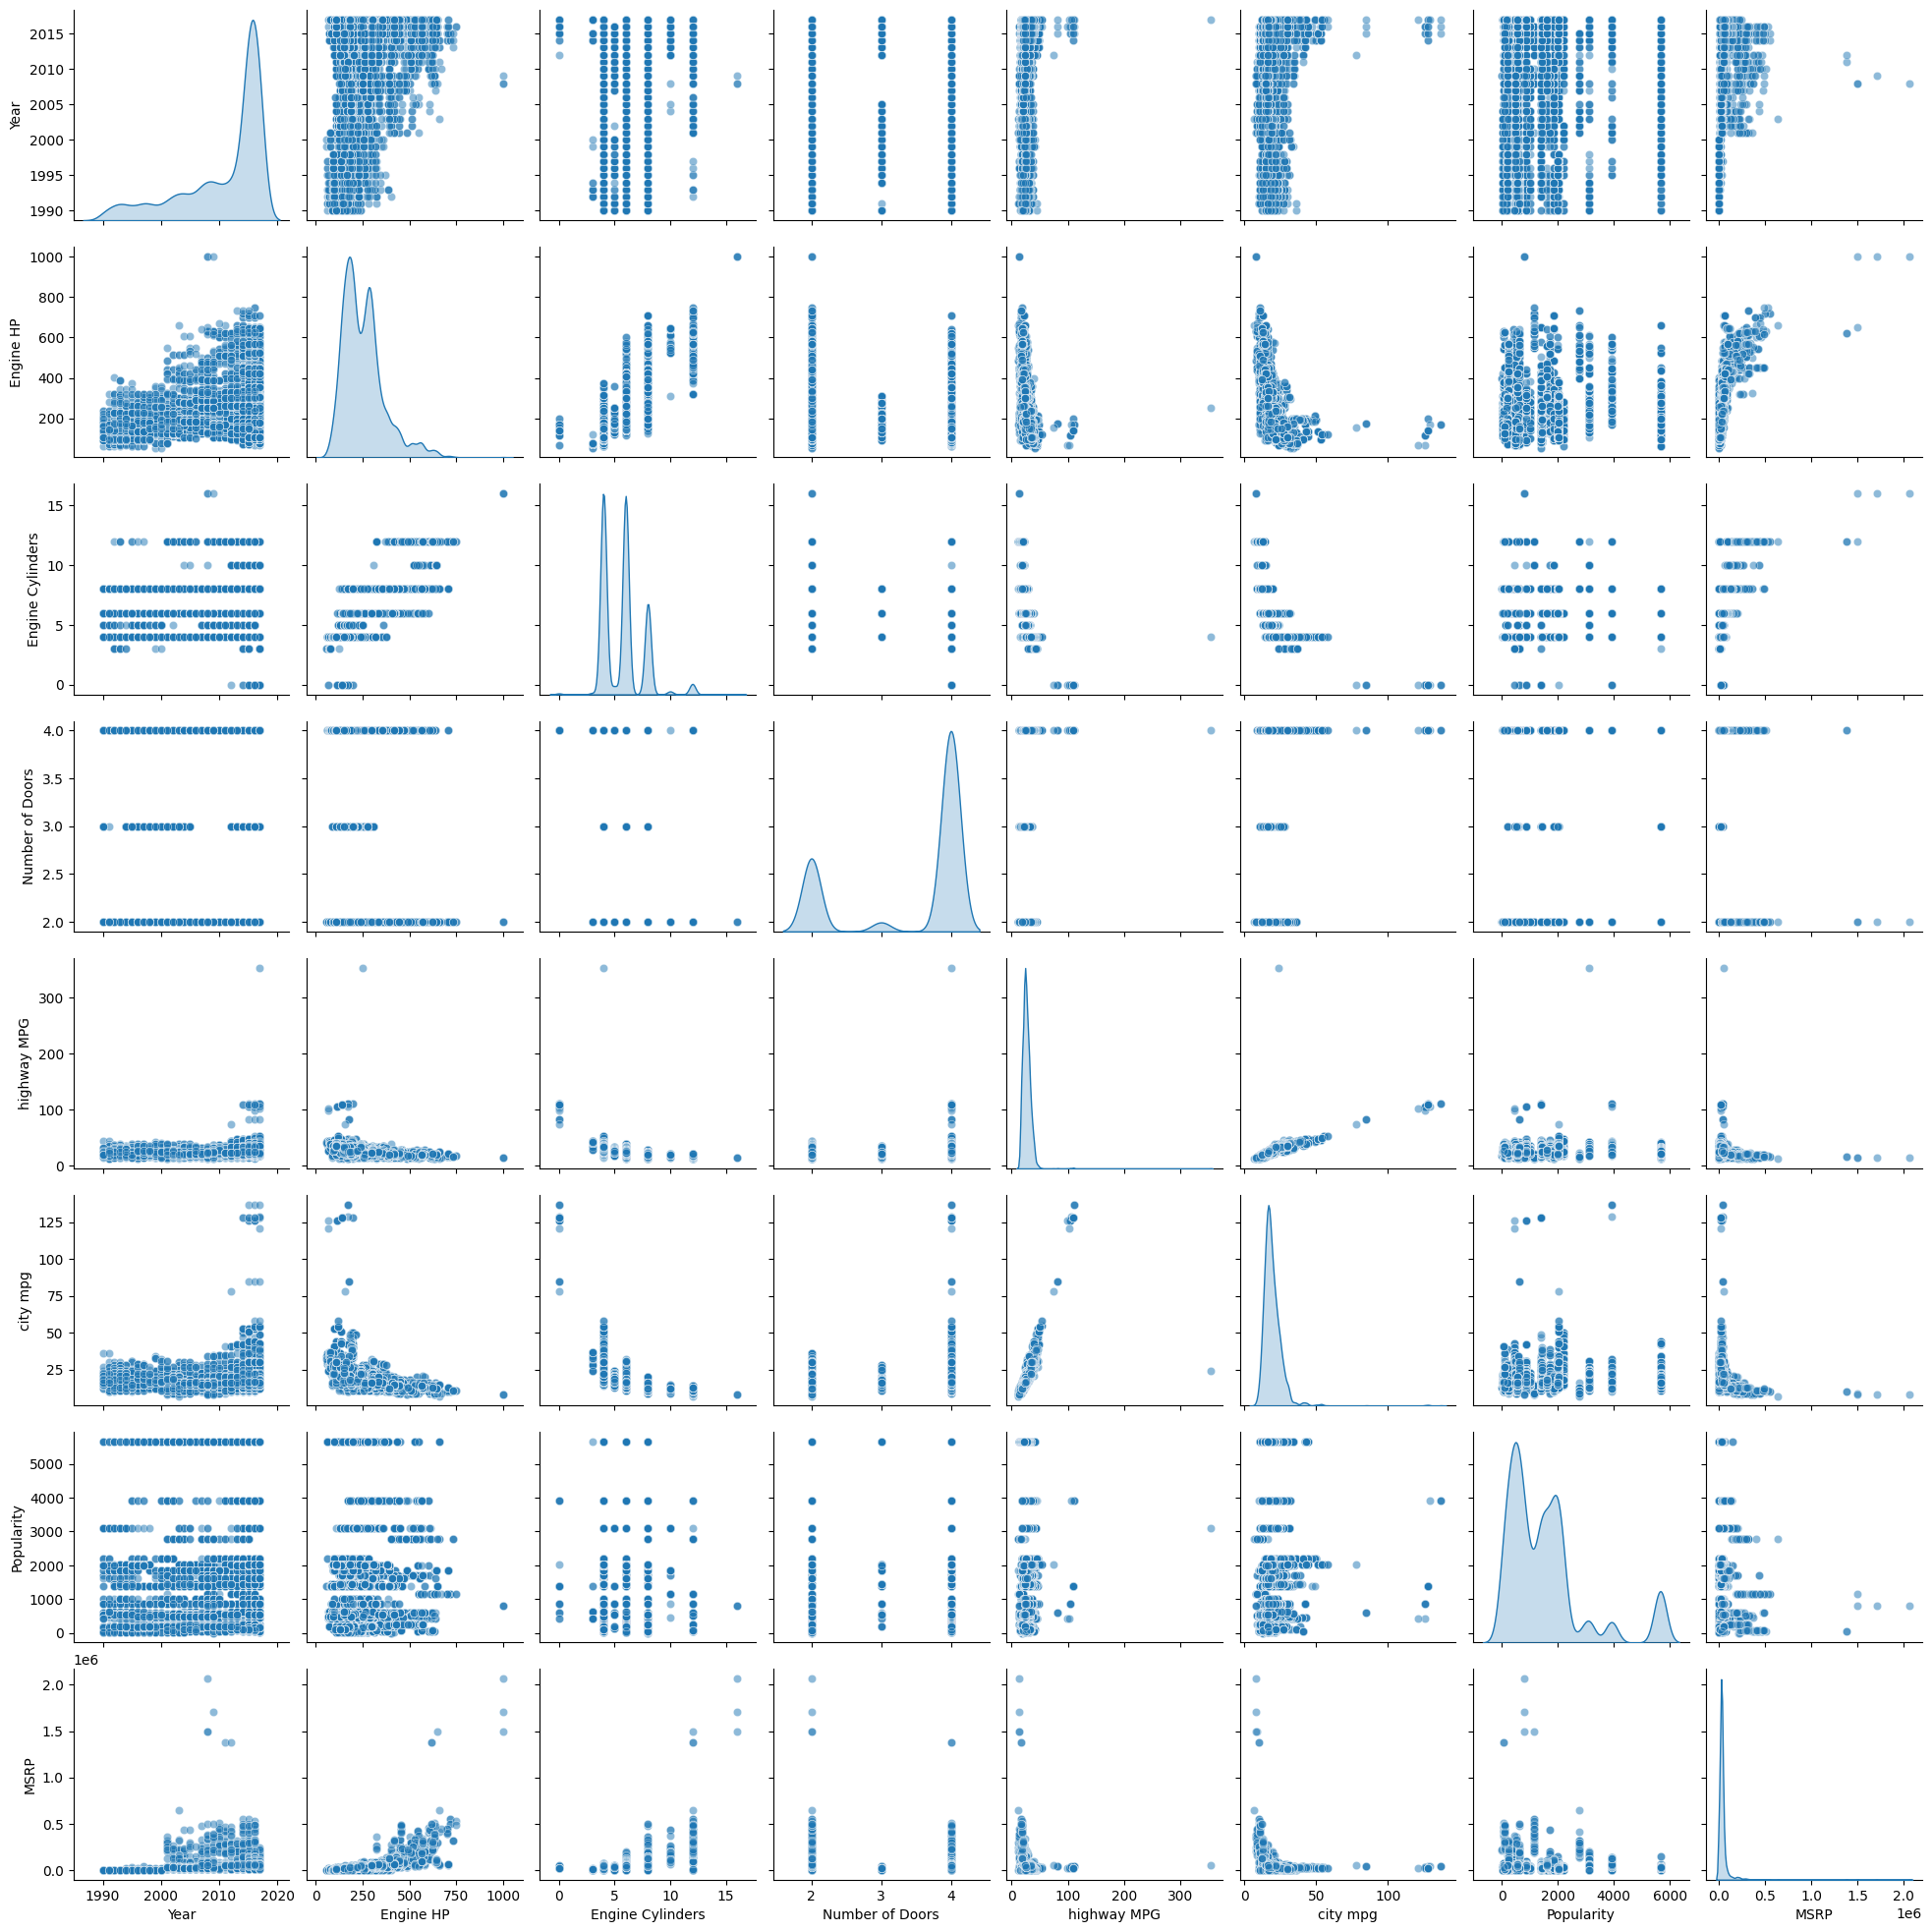

In [295]:
numerical_features = ['Year', 'Engine HP', 'Engine Cylinders',
                     'Number of Doors', 'highway MPG',
                     'city mpg', 'Popularity', 'MSRP']

# Create a pairplot
sns.pairplot(df[numerical_features], diag_kind='kde', plot_kws={'alpha': 0.5})

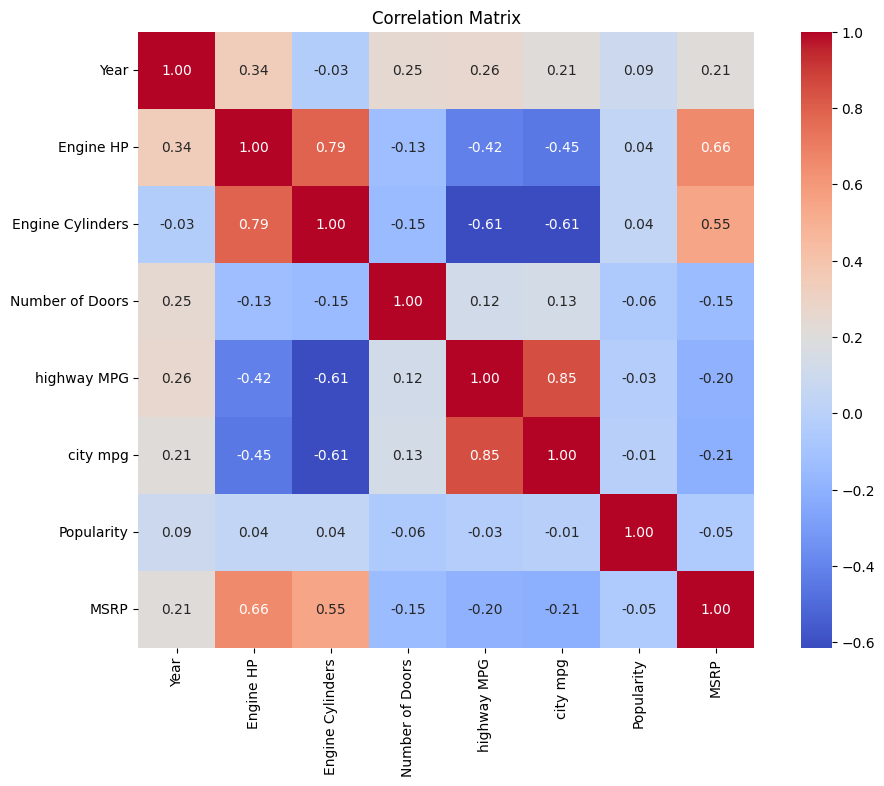

In [296]:
numerical_features = ['Year', 'Engine HP', 'Engine Cylinders',
                     'Number of Doors', 'highway MPG',
                     'city mpg', 'Popularity', 'MSRP']
# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Add titles and labels
plt.title('Correlation Matrix')
plt.show()

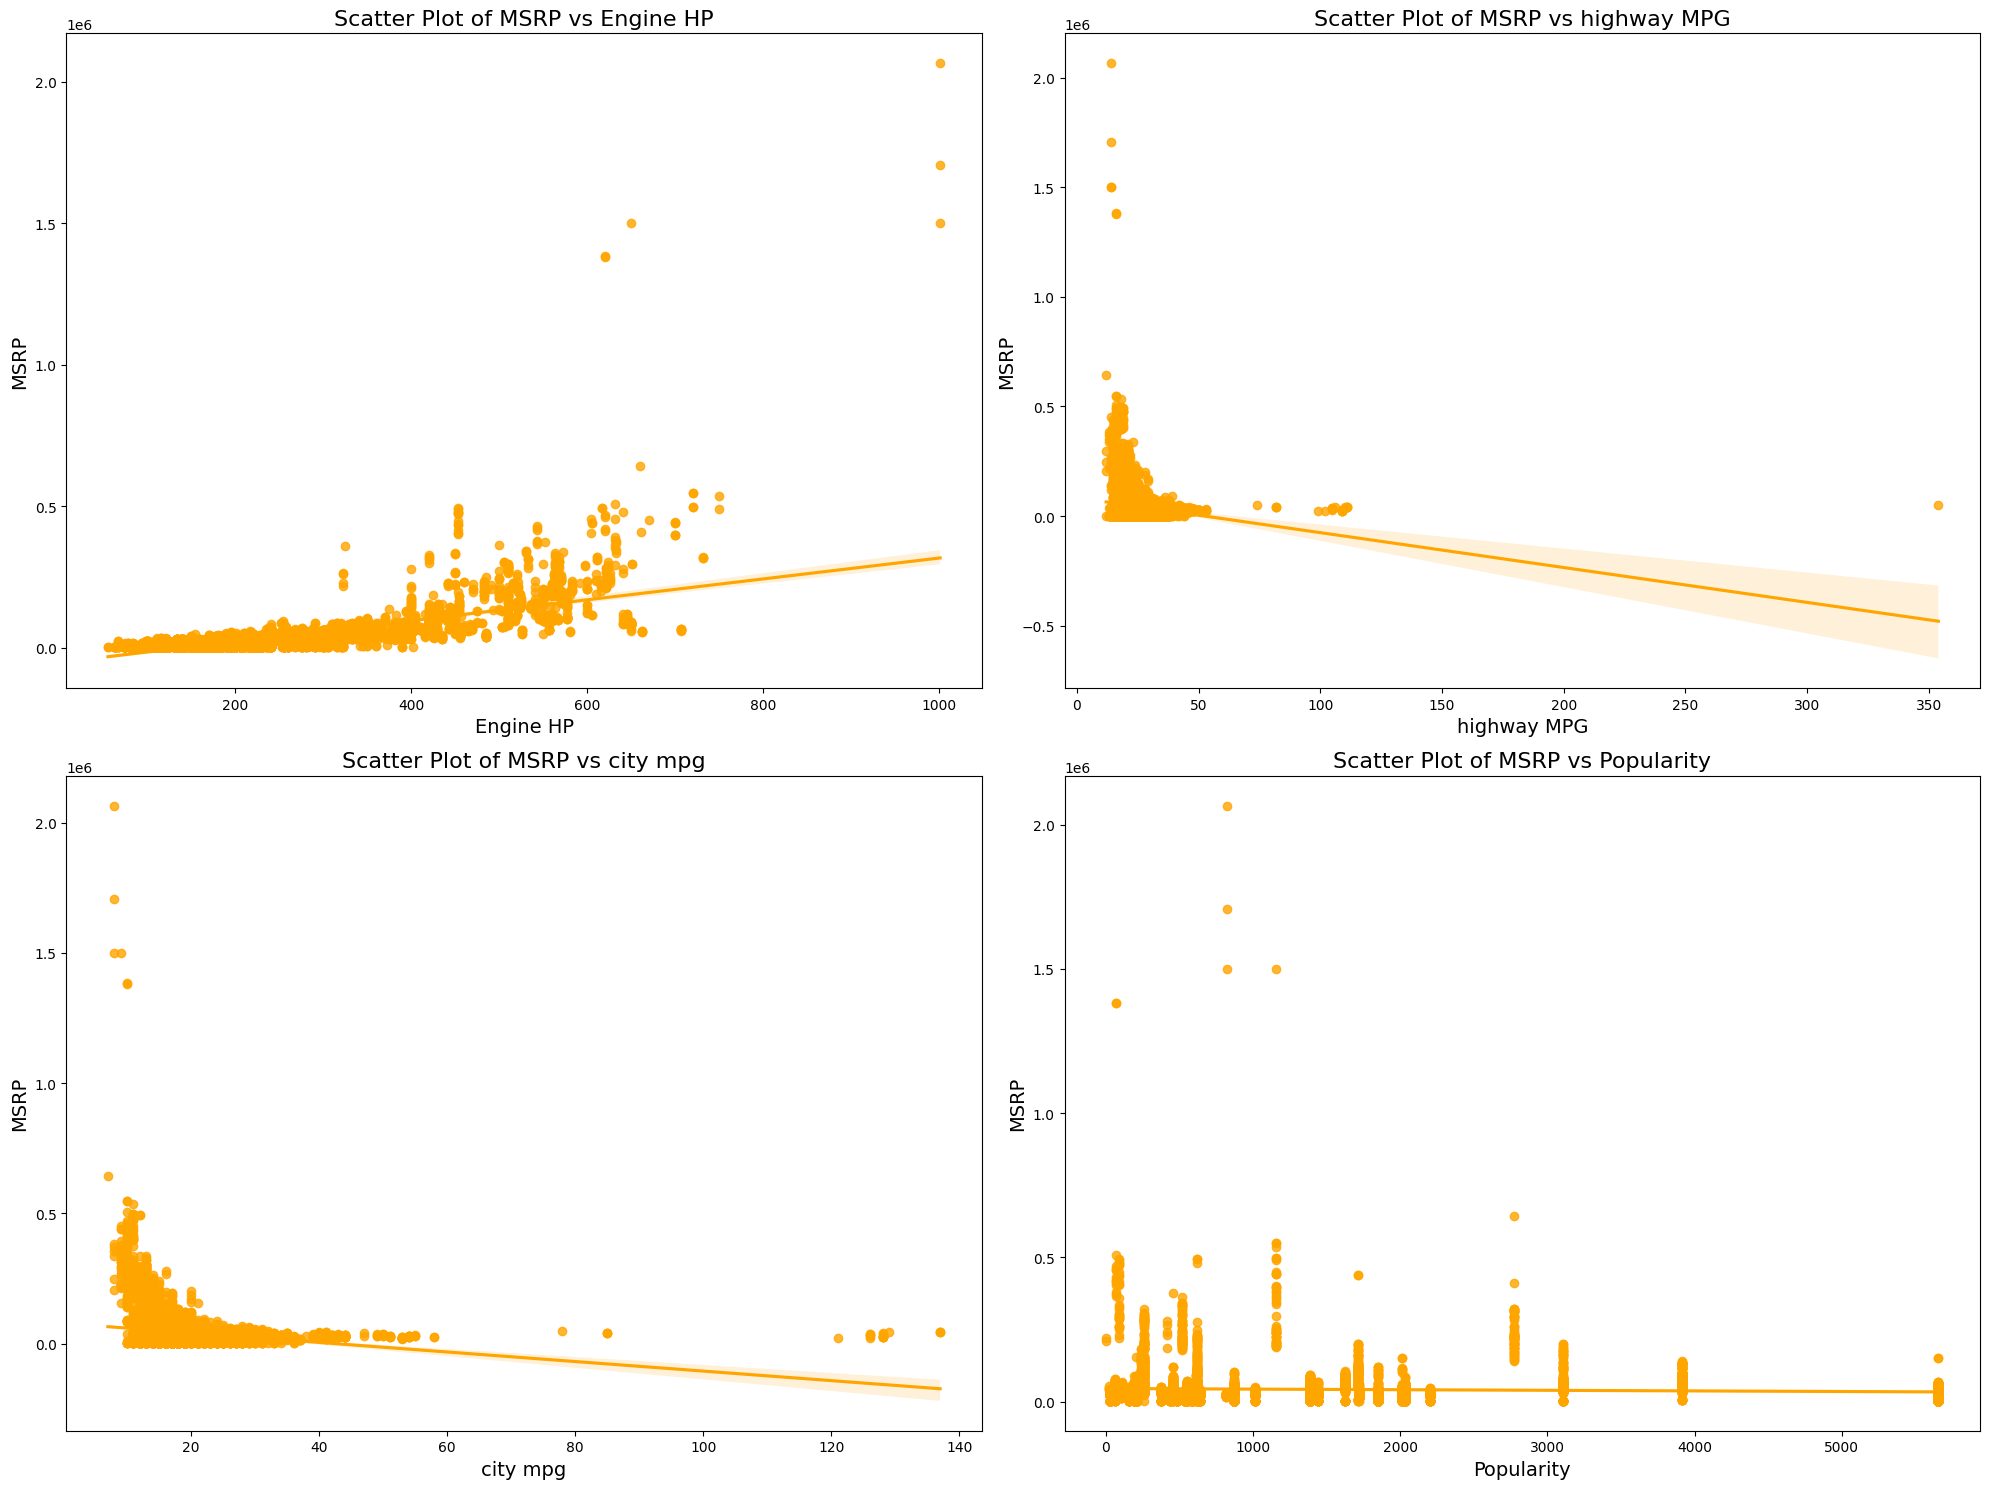

In [297]:
ls=['Engine HP','highway MPG','city mpg','Popularity']
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,15))

for i, ax in zip(ls, axes.flatten()):
    sns.regplot(data=df, x=i, y='MSRP', color='orange',ax=ax)
    ax.set_title(f'Scatter Plot of MSRP vs {i}', fontsize=16)
    ax.set_xlabel('{}'.format(i), fontsize=14)
    ax.set_ylabel('MSRP', fontsize=14)


plt.tight_layout()
plt.show()

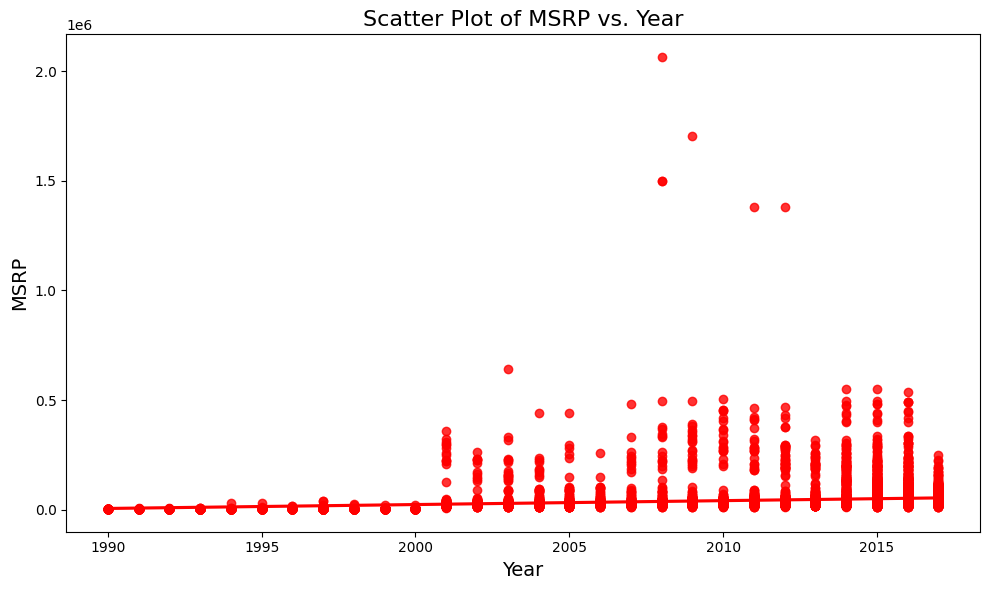

In [298]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Year', y='MSRP', color='red',)

# Adding titles and labels
plt.title('Scatter Plot of MSRP vs. Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('MSRP', fontsize=14)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

In [299]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Handling Missing Values and Outliers

In [300]:
#Since the market category column has high number of missing values(over 30%) and is not liable to affect our analysis as other features like make,
#Vehicle size, vehicle style make up for it. So first, we will drop that column.

In [301]:
df=df.drop(columns=['Market Category'],axis=1)
df.shape

(11106, 15)

In [302]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Handling Missing Values and Outliers

In [303]:
#Since the market category column has high number of missing values(over 30%) and is not liable to affect our analysis as other features like make,
#Vehicle size, vehicle style make up for it. So first, we will drop that column.

In [304]:
ul=df['MSRP'].quantile(0.990)
ll=df['MSRP'].quantile(0.010)
df=df[(df['MSRP']>=ll) & (df['MSRP']<=ul)]

In [305]:
ul=df['highway MPG'].quantile(0.995)
ll=df['highway MPG'].quantile(0.005)
df=df[(df['highway MPG']>=ll) & (df['highway MPG']<=ul)]

In [306]:
ul=df['city mpg'].quantile(0.995)
ll=df['city mpg'].quantile(0.005)
df=df[(df['city mpg']>=ll) & (df['city mpg']<=ul)]

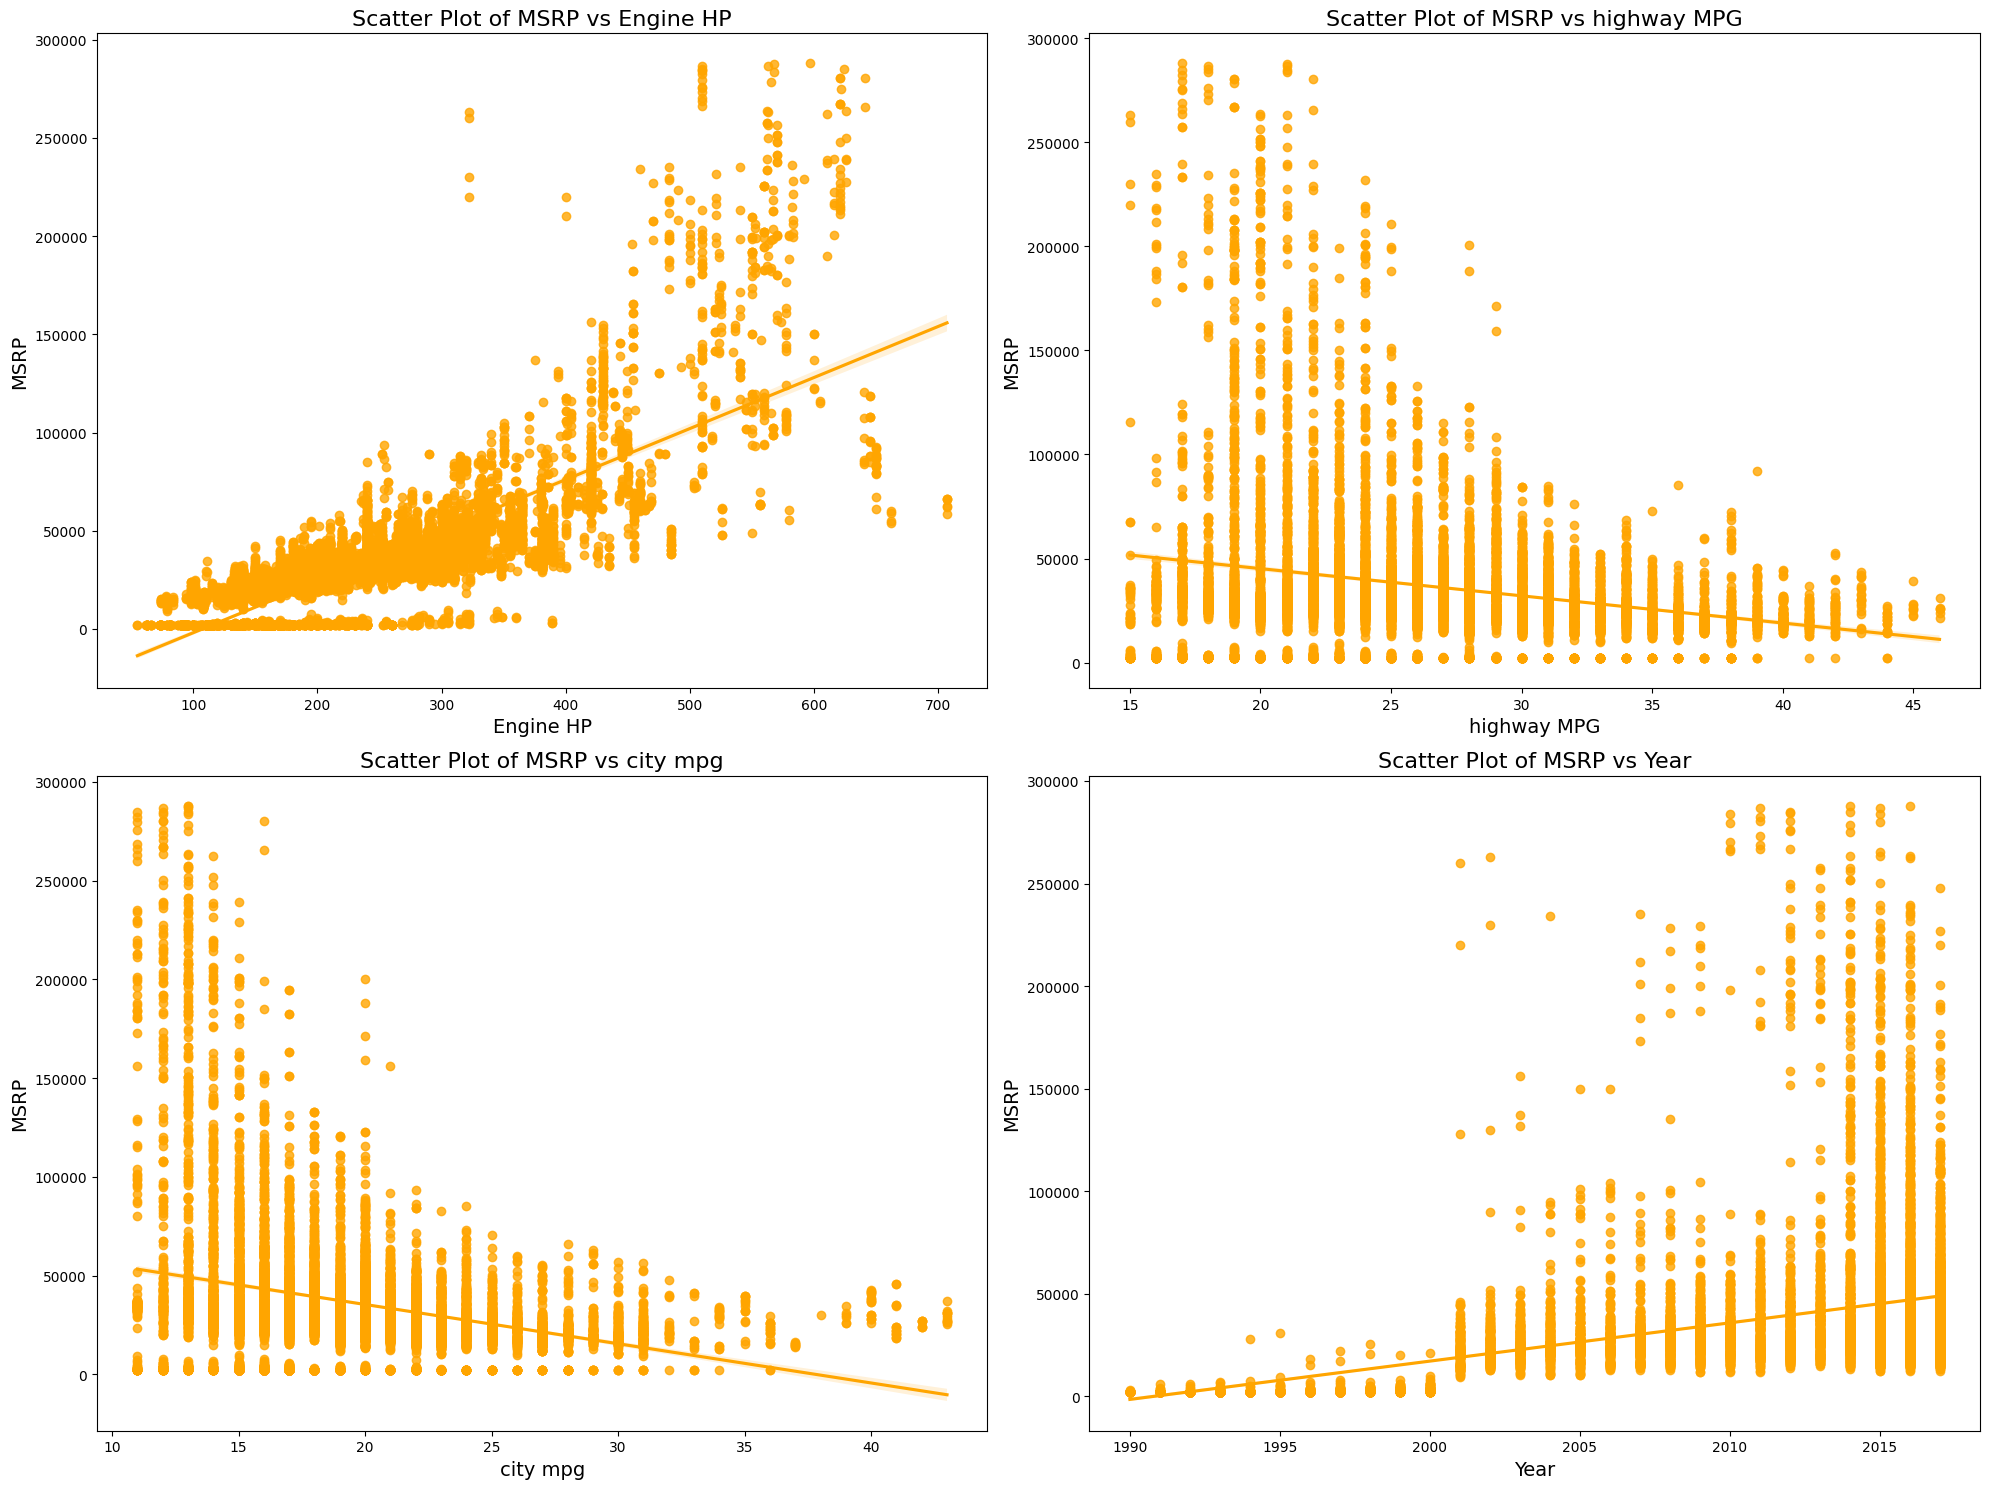

In [307]:
ls=['Engine HP','highway MPG','city mpg','Year']
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,15))

for i, ax in zip(ls, axes.flatten()):
    sns.regplot(data=df, x=i, y='MSRP', color='orange', ax=ax)
    ax.set_title(f'Scatter Plot of MSRP vs {i}', fontsize=16)
    ax.set_xlabel('{}'.format(i), fontsize=14)
    ax.set_ylabel('MSRP', fontsize=14)


plt.tight_layout()
plt.show()

# Model Training and Evaluation

### Splitting data into train and test sets

In [308]:
X=df.drop(columns=['MSRP'])
Y=df['MSRP']

In [309]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=1)

In [310]:
xtrain.shape,xtest.shape,ytrain.shape

((8644, 14), (2162, 14), (8644,))

   # Feature Engineering

In [311]:
#Next we move on to handling the categorical features.

In [312]:
df.sample(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11049,Toyota,Tundra,2017,flex-fuel (unleaded/E85),381.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,Extended Cab Pickup,18,13,2031,31290
8940,Volvo,S80,2015,regular unleaded,240.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,38,26,870,41700
2988,Chevrolet,Corvette,2016,premium unleaded (recommended),460.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,29,17,1385,70145
5955,Oldsmobile,Intrigue,2001,regular unleaded,215.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,26,17,26,24270
3350,Mazda,CX-3,2017,regular unleaded,146.0,4.0,AUTOMATIC,all wheel drive,4.0,Compact,4dr SUV,32,27,586,21210
878,Saab,9000,1996,regular unleaded,225.0,4.0,MANUAL,front wheel drive,4.0,Midsize,4dr Hatchback,25,18,376,2000
10619,Chevrolet,TrailBlazer,2008,regular unleaded,285.0,6.0,AUTOMATIC,four wheel drive,4.0,Midsize,4dr SUV,20,14,1385,29535
7819,Audi,Q5,2016,diesel,240.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr SUV,31,24,3105,57700
6548,Chevrolet,Lumina Minivan,1994,regular unleaded,120.0,6.0,AUTOMATIC,front wheel drive,3.0,Compact,Cargo Minivan,21,17,1385,2000
1553,Cadillac,ATS,2016,regular unleaded,335.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,Sedan,28,19,1624,43340


### Encoding Categorial Data and Scaling Numerical Data and variable transformations


Target variable

In [313]:
pt=PowerTransformer(method='box-cox')
ytrain_trns=pt.fit_transform(ytrain.values.reshape(-1,1))
ytest_trns=pt.transform(ytest.values.reshape(-1,1))

In [314]:
pt.lambdas_

array([0.32025984])

In [315]:
from scipy.stats import skew
skew(ytrain_trns)
#Almost normal

array([0.10469263])

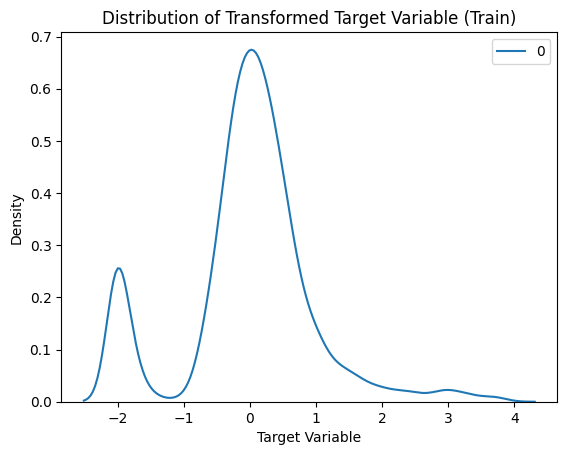

In [316]:
sns.kdeplot(ytrain_trns)
plt.title('Distribution of Transformed Target Variable (Train)')
plt.xlabel('Target Variable')
plt.ylabel('Density')
plt.show()

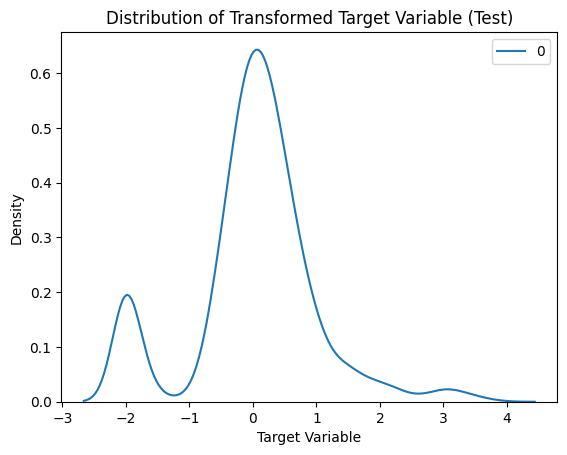

In [317]:
sns.kdeplot(ytest_trns)
plt.title('Distribution of Transformed Target Variable (Test)')
plt.xlabel('Target Variable')
plt.ylabel('Density')
plt.show()
plt.show()

Predictors

In [318]:
#Category to be made for every manufracturer as every car has a different
trf=ColumnTransformer([
    ('ohe_make',OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32,handle_unknown='ignore'),['Make']),
    ('ohe_eft',OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32,handle_unknown='ignore'),['Engine Fuel Type']),
    ('ohe_tt',OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32,handle_unknown='ignore'),['Transmission Type']),
    ('ohe_dw',OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32,handle_unknown='ignore'),['Driven_Wheels']),
    ('ohe_vsi',OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32,handle_unknown='ignore'),['Vehicle Size']),
    ('ohe_vst',OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32,handle_unknown='ignore'),['Vehicle Style']),
    ('oe_ec',OrdinalEncoder(categories=[[0,3,4,5,6,8,10,12,16]]),['Engine Cylinders']),
    ('oe_nod',OrdinalEncoder(categories=[[2,3,4]]),['Number of Doors']),
    ('sc_ehp',StandardScaler(),['Engine HP']),
    ('sc_hmpg',StandardScaler(),['highway MPG']),
    ('sc_cmpg',StandardScaler(),['city mpg']),
    ('sc_pop',StandardScaler(),['Popularity']),
    ('sc_year',StandardScaler(),['Year'])
],remainder='passthrough')

In [319]:
df['Make'].value_counts()

,count
Make,
Chevrolet,1067
Ford,803
Toyota,674
Volkswagen,554
Nissan,541
Dodge,517
GMC,481
Honda,417
Cadillac,396


In [320]:
xtrain_trns=pd.DataFrame(trf.fit_transform(xtrain),columns=trf.get_feature_names_out())
xtest_trns=pd.DataFrame(trf.transform(xtest),columns=trf.get_feature_names_out())

In [321]:
xtrain_trns.drop(columns=['remainder__Model'],inplace=True)
xtest_trns.drop(columns=['remainder__Model'],inplace=True)

In [322]:
xtrain_trns=xtrain_trns.astype('float64')
xtest_trns=xtest_trns.astype('float64')

In [323]:
xtrain_trns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8644 entries, 0 to 8643
Data columns (total 81 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   ohe_make__Make_Alfa Romeo                                               8644 non-null   float64
 1   ohe_make__Make_Aston Martin                                             8644 non-null   float64
 2   ohe_make__Make_Audi                                                     8644 non-null   float64
 3   ohe_make__Make_BMW                                                      8644 non-null   float64
 4   ohe_make__Make_Bentley                                                  8644 non-null   float64
 5   ohe_make__Make_Buick                                                    8644 non-null   float64
 6   ohe_make__Make_Cadillac                                                 8644 non

In [324]:
xtrain_trns.dtypes

,0
ohe_make__Make_Alfa Romeo,float64
ohe_make__Make_Aston Martin,float64
ohe_make__Make_Audi,float64
ohe_make__Make_BMW,float64
ohe_make__Make_Bentley,float64
...,...
sc_ehp__Engine HP,float64
sc_hmpg__highway MPG,float64
sc_cmpg__city mpg,float64
sc_pop__Popularity,float64


#### Variance Inflation Factor

In [325]:
vif_data = pd.DataFrame()
vif_data["Feature"] = xtrain_trns.columns
vif_data["VIF"] = [variance_inflation_factor(xtrain_trns.values, i) for i in range(xtrain_trns.shape[1])]
vif_data

high_vif=vif_data[vif_data['VIF']>5]
high_vif

,Feature,VIF
2,ohe_make__Make_Audi,31.778954
3,ohe_make__Make_BMW,50.904165
6,ohe_make__Make_Cadillac,9.710213
7,ohe_make__Make_Chevrolet,18.493811
9,ohe_make__Make_Dodge,16.658730
12,ohe_make__Make_Ford,302.156324
16,ohe_make__Make_Honda,20.451700
17,ohe_make__Make_Hyundai,5.123988
19,ohe_make__Make_Kia,7.046204
30,ohe_make__Make_Nissan,21.585894


#### PCA

In [326]:
#As there is multicollineairity in the data, we will apply principal component analysis
pca=PCA(n_components=30)
xtrain_pca=pca.fit_transform(xtrain_trns)
xtest_pca=pca.transform(xtest_trns)

In [327]:
pca.explained_variance_ratio_.round(3)

array([0.349, 0.14 , 0.099, 0.086, 0.04 , 0.03 , 0.028, 0.021, 0.018,
       0.015, 0.014, 0.012, 0.011, 0.009, 0.009, 0.007, 0.007, 0.006,
       0.006, 0.005, 0.005, 0.005, 0.004, 0.004, 0.004, 0.004, 0.004,
       0.003, 0.003, 0.003])

In [328]:
pca.explained_variance_ratio_.cumsum()

array([0.34921856, 0.48970278, 0.58865906, 0.67433441, 0.71386634,
       0.74416394, 0.77200001, 0.79331368, 0.81180341, 0.82660211,
       0.8410654 , 0.8531682 , 0.86416089, 0.87321749, 0.88202787,
       0.8892944 , 0.89607663, 0.90196393, 0.90759039, 0.91243637,
       0.91707432, 0.92159661, 0.92596546, 0.93013212, 0.93419105,
       0.93791524, 0.94149363, 0.9449295 , 0.9481527 , 0.95121266])

In [329]:
lr=LinearRegression()
lr.fit(xtrain_pca,ytrain_trns)

LinearRegression()

In [330]:
ypred=lr.predict(xtest_pca)

In [331]:
r2_score(ytest_trns,ypred)

0.8349284898926568

In [332]:
r2_score(ytrain_trns,lr.predict(xtrain_pca))

0.8262275277947269

In [333]:
r=np.mean(cross_val_score(lr,
                        pca.fit_transform(pd.DataFrame(trf.fit_transform(df.drop(columns=['Model','MSRP'])))),
                        pt.fit_transform(df[['MSRP']]),
                        scoring='r2',cv=5))
r

0.8094702712979422

In [334]:
xtrain_pca.shape

(8644, 30)

In [335]:
n=xtrain_pca.shape[0]
p=xtrain_pca.shape[1]
r2=r
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adjusted_r2

0.8088066358792656

In [336]:
mean_squared_error(ytest_trns,ypred)

0.16245846830590938

In [337]:
ytrainpred=lr.predict(xtrain_pca)
ytrainpred=pd.DataFrame(ytrainpred)[0]
res1=ytrain_trns-ytrainpred.values.reshape(-1,1)

In [338]:
ytrainpred.values.shape

(8644,)

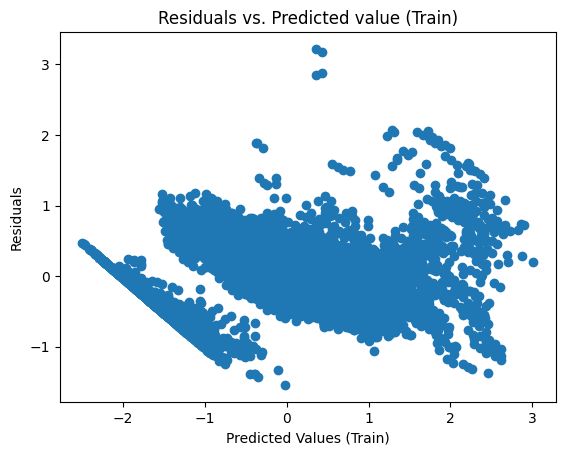

In [339]:
plt.scatter(ytrainpred,res1)
plt.title('Residuals vs. Predicted value (Train)')
plt.xlabel('Predicted Values (Train)')
plt.ylabel('Residuals')
plt.show()

In [340]:
ytestpred=lr.predict(xtest_pca)
ytestpred=pd.DataFrame(ytestpred)[0]
res2=ytest_trns-ytestpred.values.reshape(-1,1)

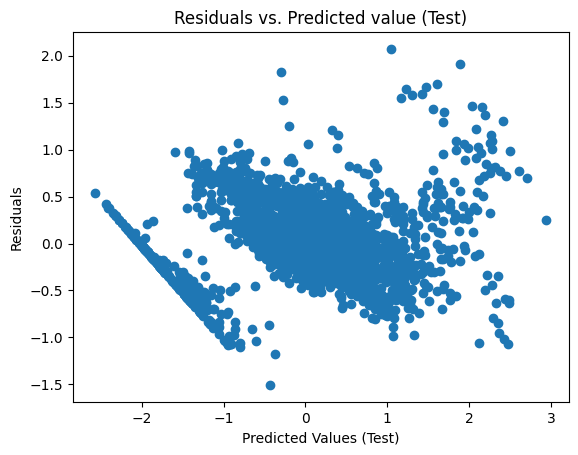

In [341]:
plt.scatter(ytestpred,res2)
plt.title('Residuals vs. Predicted value (Test)')
plt.xlabel('Predicted Values (Test)')
plt.ylabel('Residuals')
plt.show()

In [342]:
y1=pca.components_[0]
y1.shape

(81,)

In [343]:
y1

array([-2.08150682e-04,  7.06069344e-03, -4.37946762e-04,  4.84604318e-03,
        3.82355698e-03, -1.77846652e-03,  9.76583574e-03,  9.03510318e-03,
        3.16166715e-04,  1.01853473e-02, -3.73418620e-03,  2.09369357e-03,
        1.61396536e-02,  1.46718499e-02,  9.10901017e-05,  5.66524130e-04,
       -1.60699604e-02, -7.90208224e-03,  6.93331598e-03, -6.91163466e-03,
        2.76667207e-03,  3.36085640e-03,  1.48476252e-03,  2.34730387e-03,
        1.00345715e-04,  2.83024622e-03, -1.22791526e-02,  3.82617066e-04,
        1.01798974e-02, -5.00798765e-03, -1.96585905e-03, -6.30907797e-04,
       -2.34447618e-03, -1.50444995e-03,  3.88805458e-03,  9.59271739e-04,
       -1.77714971e-03, -3.48827859e-03,  1.40023771e-04, -8.53208193e-03,
       -8.71388197e-03,  5.97855225e-04, -2.40377228e-02, -4.51420841e-03,
        1.17119176e-04,  3.97535402e-03,  2.92990623e-02, -1.53379241e-04,
       -1.38800557e-02,  5.63572195e-02, -6.80990524e-02,  4.22172017e-02,
       -3.79873212e-02,  

In [344]:
fpc=np.dot(xtest_trns,y1)
fpc.shape

(2162,)

In [345]:
m=lr.coef_[0][0]  #slope for first principle component
c=lr.intercept_[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


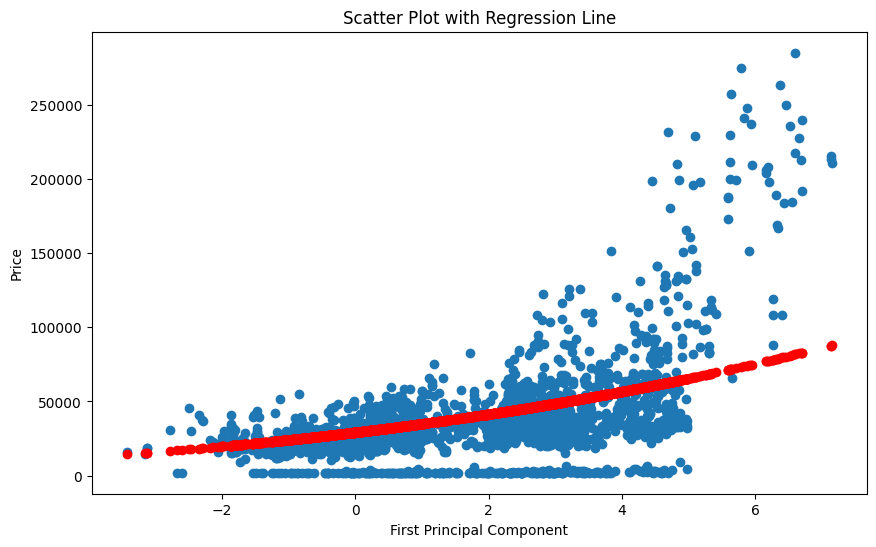

In [346]:
plt.figure(figsize=(10, 6))
plt.scatter(fpc, ytest)
plt.scatter(fpc, pt.inverse_transform((m*fpc+c).reshape(-1,1)), color='red')
plt.xlabel('First Principal Component')
plt.ylabel('Price')
plt.title('Scatter Plot with Regression Line')
plt.show()

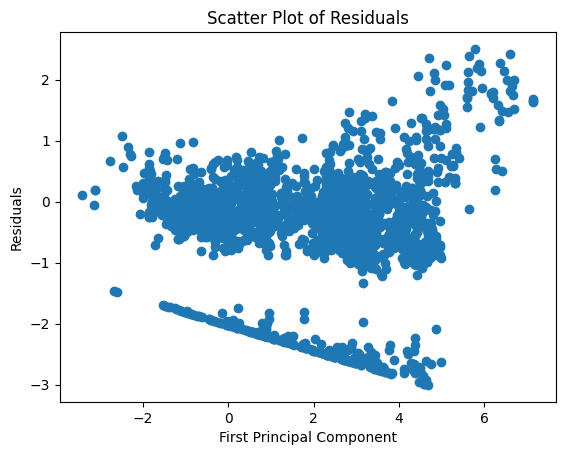

In [347]:
res=ytest_trns-pd.DataFrame((m*fpc+c))
plt.scatter(fpc, res)
plt.xlabel('First Principal Component')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Residuals')
plt.show()

In [348]:
y2=pca.components_[1]
y2.shape

(81,)

In [349]:
spc=np.dot(xtest_trns,y2)
spc.shape

(2162,)

In [350]:
m=lr.coef_[0][1]  #slope for second principle component
c=lr.intercept_[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


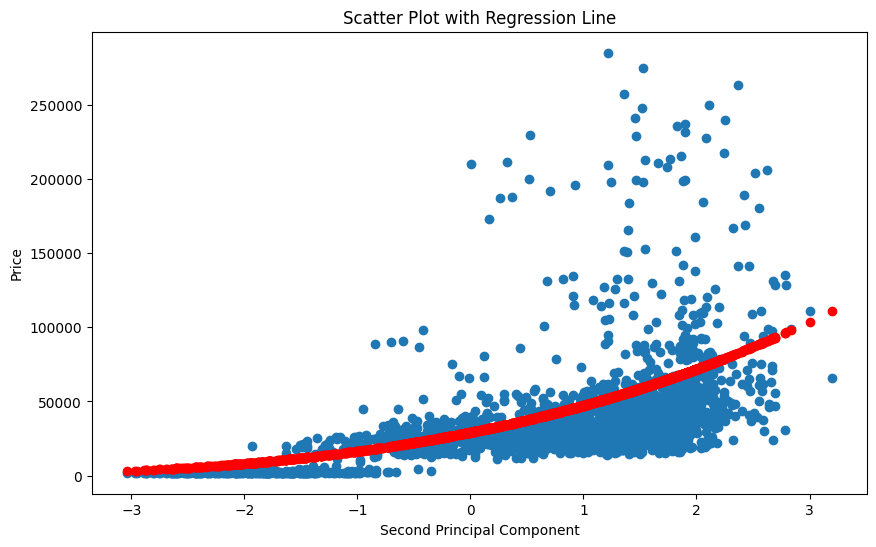

In [351]:
plt.figure(figsize=(10, 6))
plt.scatter(spc, ytest)
plt.scatter(spc, pt.inverse_transform((m*spc+c).reshape(-1,1)), color='red')
plt.xlabel('Second Principal Component')
plt.ylabel('Price')
plt.title('Scatter Plot with Regression Line')
plt.show()

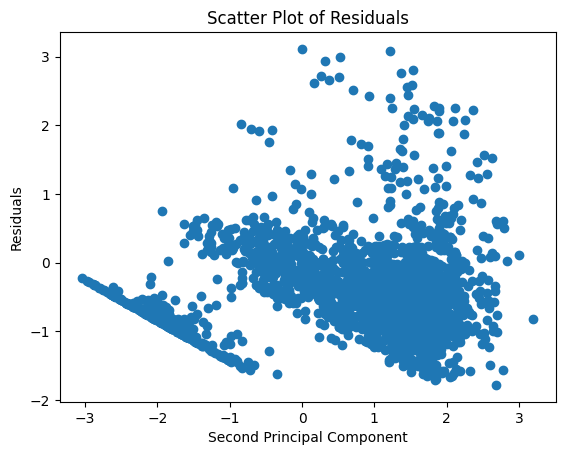

In [352]:
res=ytest_trns-pd.DataFrame((m*spc+c))
plt.scatter(spc, res)
plt.xlabel('Second Principal Component')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Residuals')
plt.show()

In [353]:
pca_coef_alpha=pd.DataFrame(pca.components_.reshape(-1,xtrain_trns.shape[1]))

In [354]:
rg_coef_beta=pd.DataFrame(lr.coef_)

In [355]:
input_var_contribution=pd.DataFrame()

In [356]:
input_var_contribution['predictors']=xtrain_trns.columns
input_var_contribution

,predictors
0,ohe_make__Make_Alfa Romeo
1,ohe_make__Make_Aston Martin
2,ohe_make__Make_Audi
3,ohe_make__Make_BMW
4,ohe_make__Make_Bentley
...,...
76,sc_ehp__Engine HP
77,sc_hmpg__highway MPG
78,sc_cmpg__city mpg
79,sc_pop__Popularity


In [357]:
result=pd.DataFrame(np.dot(rg_coef_beta,pca_coef_alpha))
result=np.transpose(result)
result

input_var_contribution['weights']=result

In [358]:
input_var_contribution.sort_values(by='weights',ascending=False)

,predictors,weights
80,sc_year__Year,0.489236
76,sc_ehp__Engine HP,0.372257
49,ohe_eft__Engine Fuel Type_premium unleaded (re...,0.315950
64,ohe_vst__Vehicle Style_Convertible,0.178170
6,ohe_make__Make_Cadillac,0.151074
...,...,...
58,ohe_vsi__Vehicle Size_Midsize,-0.159758
56,ohe_dw__Driven_Wheels_rear wheel drive,-0.163450
9,ohe_make__Make_Dodge,-0.165122
57,ohe_vsi__Vehicle Size_Large,-0.190741


In [359]:
#Accprding to our model, the highest contribution is due to Year followed by Engine HP
#Other important factors are that the vehicle showuld be convertible.
#Cars by Cadillac are priced very high

## Ridge and Lasso Regession

In [360]:
RR=Ridge()

parameter={'alpha':[0.0001,0.001,0.01,0.1,0.5,1,10,100]}
grid=GridSearchCV(RR,parameter,cv=5)
grid.fit(xtrain_trns,ytrain_trns)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 100]})

In [361]:
grid.cv_results_

{'mean_fit_time': array([0.01313882, 0.01319771, 0.01391535, 0.02056813, 0.01820378,
        0.01815867, 0.0142561 , 0.01321182]),
 'std_fit_time': array([0.0004407 , 0.00020658, 0.00114931, 0.00604937, 0.0051663 ,
        0.01052816, 0.00088484, 0.00049599]),
 'mean_score_time': array([0.00384707, 0.00395942, 0.00388961, 0.00578375, 0.00440302,
        0.0043191 , 0.00388741, 0.00376153]),
 'std_score_time': array([8.87473762e-05, 3.06897781e-04, 1.62756851e-04, 2.28687535e-03,
        3.42923455e-04, 1.14300573e-03, 9.77318441e-05, 1.08708415e-04]),
 'param_alpha': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 10.0, 100.0],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=1e+20),
 'params': [{'alpha': 0.0001},
  {'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 0.5},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 100}],
 'split0_test_score': array([0.86874723, 0.86874725, 0.86874735, 0.86874292, 0.86863615,
      

In [362]:
ypred1=grid.predict(xtest_trns)

In [363]:
r2_score(ytest_trns,ypred1)

0.8844586316903008

In [364]:
r2_score(ytrain_trns,grid.predict(xtrain_trns))

0.8729653204751129

In [365]:
r=np.mean(cross_val_score(grid,pd.DataFrame(trf.fit_transform(df.drop(columns=['Model','MSRP']))),pt.fit_transform(df[['MSRP']]),scoring='r2',cv=5))
r

0.8260643789741948

In [366]:
n=xtrain_trns.shape[0]
p=xtrain_trns.shape[1]
r2=r
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adjusted_r2

0.8244188773036634

In [367]:
mean_squared_error(ytest_trns,ypred1)

0.11371237658973628

In [368]:
ytrainpredrr=grid.predict(xtrain_trns)
ytrainpredrr=pd.DataFrame(ytrainpredrr)[0]
res_rr=ytrain_trns-ytrainpredrr.values.reshape(-1,1)

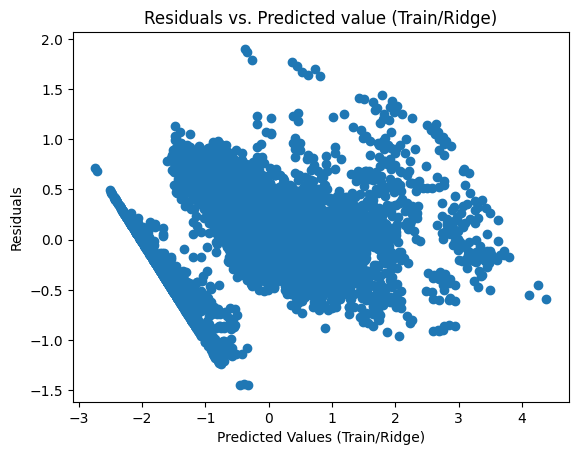

In [369]:
plt.scatter(ytrainpredrr,res_rr)
plt.title('Residuals vs. Predicted value (Train/Ridge)')
plt.xlabel('Predicted Values (Train/Ridge)')
plt.ylabel('Residuals')
plt.show()

In [370]:
Ls=Lasso()

parameter={'alpha':[0.0001,0.001,0.01,0.1,1,10,100]}
grid=GridSearchCV(Ls,parameter,cv=5)
grid.fit(xtrain_trns,ytrain_trns)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]})

In [371]:
grid.cv_results_

{'mean_fit_time': array([0.15179758, 0.11971483, 0.05034466, 0.04267015, 0.03081355,
        0.02231727, 0.02726498]),
 'std_fit_time': array([0.02800647, 0.02267893, 0.00770167, 0.00895573, 0.00577778,
        0.01804118, 0.01903813]),
 'mean_score_time': array([0.00616775, 0.00844784, 0.00745025, 0.00814099, 0.00955777,
        0.00404425, 0.00615077]),
 'std_score_time': array([0.0019477 , 0.00654415, 0.00038108, 0.00305871, 0.00353072,
        0.00041755, 0.00398182]),
 'param_alpha': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
              mask=[False, False, False, False, False, False, False],
        fill_value=1e+20),
 'params': [{'alpha': 0.0001},
  {'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 100}],
 'split0_test_score': array([ 0.86859145,  0.86006178,  0.80423529,  0.75305787, -0.00284944,
        -0.00284944, -0.00284944]),
 'split1_test_score': array([ 8.66173526e-01,  8.58612780e-01,  8.09105182e

In [372]:
ypred1=grid.predict(xtest_trns)

In [373]:
r2_score(ytest_trns,ypred1)

0.8841996980951886

In [374]:
r2_score(ytrain_trns,grid.predict(xtrain_trns))

0.8728028578430662

In [375]:
np.mean(cross_val_score(grid,pd.DataFrame(trf.fit_transform(df.drop(columns=['Model','MSRP']))),pt.fit_transform(df[['MSRP']]),scoring='r2',cv=5))

0.8204773853736038

In [376]:
mean_squared_error(ytest_trns,ypred1)

0.11396721132910173

## Contribution of Input Variables Prediction